### This is a library to find the best performing configuration from a set of dimensions (i.e. schemas, partition, storage) which can be specified inside the <b>settings.yaml</b> file in the resource

### Load the configuration file and log files location for the experiment

<p>Configurations for Watdiv Data</p>

In [1]:
config_watdiv = "settings_watdiv.yaml" # config file location
logs_watdiv = "log_watdiv" # logs file location

#### <u>Configuration file</u> <br>
The configuration file is a yaml data-serialization language which has two main parts, the dimensions and the number of query experiments. You can add more dimensions here or change these existing dimensions to anything you need

<i>Example :</i> 
```yaml
dimensions:
    schemas: ["st", "vt", "pt"]
    partition: ["horizontal", "predicate", "subject"]
    storage: ["csv", "avro", "parquet", "orc"]

query: 20
```

#### <u>Log file structure</u> <br>
the structure of the log files must follow the order of dimensions in the configuration file (i.e. {schemas}.{partition}.{storage}.txt) and the subfolders should be the ranking sets of the experiments (i.e. dataset sizes)

<i>Example :</i>
```
UI Module
└───log
    │
    |───100M
    |    │   st.horizontal.csv.txt
    |    │   st.horizontal.avro.txt
    |    │   ...
    │
    └───250M
        |   st.horizontal.csv.txt
        │   st.horizontal.avro.txt
        │   ...
```

### Single Dimensional Ranking

<b>SDRank</b> is a class module from PAPyA library to calculate ranking score _R_ for each dimension independently that operates over a log-based structure that user specified on the configuration file.<br> 
The value of _R_ represents the performance of a particular configuration (higher value means better performing configuration). We used Ranking Function _R_ below to calculate the rank scores:

$$R =\sum \limits _{r=1} ^{d} \frac{O_{dim} * (d-r)}{|Q| * (d-1)}, 0<R<=1$$

$d$         : total number of parameters (options) in a particular dimension<br>
$O_{dim}$   : number of occurences of the dimension placed at rank $r$ (Rank 1, Rank 2, Rank 3, ...)<br>
$|Q|$       : total number of queries

### PAPyA.Rank.SDRank

#### <i>class</i> Rank.<b>SDRank</b>(<i>config_path, log_path, ranking_sets, dimension</i>)
<i>Parameters:</i> <br>
&emsp; <b>config_path : str</b><br>
&emsp;&emsp;<small>Specify the path to your configuration file(s). <i>i.e ./UIModule/settings_watdiv.yaml</small></i><br>
&emsp;<b>log_path : str</b><br>
&emsp;&emsp;<small>Specify the path to your log file(s). <i>i.e ./UI Module/log_watdiv</small></i><br>
&emsp;<b>ranking_sets : str</b><br>
&emsp;&emsp;<small>Ranking sets of user choice. <i>i.e dataset sizes (100M)</small></i><br>
&emsp;<b>dimension : str</b><br>
&emsp;&emsp;<small>A single dimension to be ranked. <i>i.e schemas</small></i><br>


In [2]:
# this class takes single dimension and dataset sizes as parameters that user specified inside their log files
from Rank import SDRank

schemaSDRank_100M = SDRank(config_watdiv, logs_watdiv, '100M', 'schemas')
schemaSDRank_250M = SDRank(config_watdiv, logs_watdiv, '250M', 'schemas')
schemaSDRank_500M = SDRank(config_watdiv, logs_watdiv, '500M', 'schemas')
partitionSDRank_100M = SDRank(config_watdiv, logs_watdiv, '100M', 'partition')
partitionSDRank_250M = SDRank(config_watdiv, logs_watdiv, '250M', 'partition')
partitionSDRank_500M = SDRank(config_watdiv, logs_watdiv, '500M', 'partition')
storageSDRank_100M = SDRank(config_watdiv, logs_watdiv, '100M', 'storage')
storageSDRank_250M = SDRank(config_watdiv, logs_watdiv, '250M', 'storage')
storageSDRank_500M = SDRank(config_watdiv, logs_watdiv, '500M', 'storage')

### file_reader.FileReader.file_reader

#### FileReader.<b>file_reader</b>()
<small>The function that shows run times over the configuration specified in the FileReader class parameters.</small><br><br>
<small>Returns a table of query runtimes from the user's log files specified in the class parameter</small><br><br>


In [3]:
from PAPyA.file_reader import FileReader
FileReader(config_watdiv, logs_watdiv, '100M', 'schemas').file_reader()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
st.horizontal.parquet,42.851832,31.255078,22.174979,12.005477,13.714514,9.477752,14.522708,8.695502,14.358596,6.946541,3.809338,3.786768,4.729582,12.521288,7.580997,5.955275,7.073934,6.657533,4.574752,4.485021
pt.horizontal.parquet,29.705233,27.226184,13.563699,5.471808,1.712167,6.347061,7.453573,4.990345,2.551693,4.187307,1.611278,2.905809,0.912930,10.697829,4.087255,3.894859,1.259760,1.535139,1.713169,1.915273
vp.horizontal.parquet,29.900217,14.293355,16.375756,10.018105,10.813738,8.621654,8.471594,15.135567,3.660285,6.144343,1.608665,1.454138,1.347477,20.024591,5.494565,5.834006,6.246191,5.087803,9.166145,8.056221
st.horizontal.orc,54.850234,31.430518,22.319936,9.725038,11.954771,8.571278,11.896514,7.208464,14.454267,6.091672,3.317276,3.543872,4.368454,9.858340,6.721644,5.291964,6.246700,5.650803,3.761176,3.978417
pt.horizontal.orc,37.031554,23.996726,13.437864,5.076646,1.753417,5.917714,9.107865,4.531680,3.021133,1.744814,7.243586,4.113663,1.664544,11.142699,3.595029,3.822973,1.595811,0.895096,2.323493,2.564751
vp.horizontal.orc,40.746580,16.365281,20.026636,10.442703,12.526284,8.359064,12.807408,13.336649,2.950071,1.980077,6.877400,1.409394,1.752933,20.184179,6.849186,7.238274,5.789324,2.978065,11.232495,10.177700
st.horizontal.csv,133.319849,147.590254,97.366945,89.736308,109.323247,84.895580,122.344850,85.462280,52.535217,50.812861,33.257444,33.090344,48.401680,121.952885,62.160638,59.934183,61.485345,62.762216,45.883996,46.840266
pt.horizontal.csv,21.221714,22.315849,25.526566,2.565546,1.449814,5.328520,3.409032,4.414645,2.676067,3.357321,1.801182,2.881395,1.245827,3.313448,4.557536,1.228719,1.971898,0.850228,1.478027,1.856194
vp.horizontal.csv,23.799746,15.969971,25.514704,4.853881,4.366317,4.289073,6.802763,5.390903,2.113711,2.287722,1.974056,1.589721,1.164486,6.226537,5.168740,2.329506,2.844042,2.262072,2.139993,2.375006
st.horizontal.avro,63.850391,50.918349,37.732766,26.615154,31.863258,24.470381,36.341714,24.316141,22.844314,14.691997,10.593254,10.822220,13.655790,35.586508,18.391621,17.850800,18.131226,17.423713,13.269315,13.560959


### Rank.SDRank.calculateRank

#### SDRank.<b>calculateRank</b>(<i>*args</i>)
<small>The function that automates calculating the rank scores of a single dimension using the Ranking Function above.</small><br><br>
<small>Returns a table of configurations which is sorted based on the best performing configuration according to their Ranking Score along with number of occurences of the dimension being placed at the rank _r_ (1st, 2nd, 3rd, ...)</small><br><br>
<i>Parameters:</i> <br>
&emsp; <b>*args : str or list</b><br>
&emsp;&emsp;<small>This method takes an arbitrary number of parameters of strings and lists.<br>
&emsp;&emsp;&ensp;str -> slice the table according to string input. <i>i.e. "predicate" will slice the table by the <b>predicate</b> partitioning</i><br>
&emsp;&emsp;&ensp;list -> remove some queries out of the ranking calculations. <i>i.e [7,8,9] will remove query <b>7, 8,and 9</b> from the calculation</small></i><br>


In [5]:
schemaSDRank_100M.calculateRank()

,Rank 1,Rank 2,Rank 3,Result
vp.predicate.csv,20.0,0.0,0.0,1.000
vp.predicate.avro,18.0,2.0,0.0,0.950
pt.horizontal.parquet,17.0,3.0,0.0,0.925
pt.subject.avro,16.0,4.0,0.0,0.900
pt.horizontal.avro,15.0,5.0,0.0,0.875
pt.subject.parquet,15.0,3.0,2.0,0.825
pt.horizontal.orc,15.0,3.0,2.0,0.825
pt.subject.csv,13.0,7.0,0.0,0.825
pt.horizontal.csv,13.0,7.0,0.0,0.825
st.predicate.orc,10.0,10.0,0.0,0.750


In [6]:
schemaSDRank_250M.calculateRank()

,Rank 1,Rank 2,Rank 3,Result
vp.predicate.csv,19.0,1.0,0.0,0.975
vp.predicate.avro,18.0,2.0,0.0,0.950
pt.horizontal.avro,17.0,3.0,0.0,0.925
pt.horizontal.parquet,17.0,3.0,0.0,0.925
pt.subject.parquet,16.0,4.0,0.0,0.900
pt.horizontal.orc,16.0,4.0,0.0,0.900
pt.subject.avro,16.0,4.0,0.0,0.900
pt.horizontal.csv,16.0,4.0,0.0,0.900
pt.subject.csv,14.0,6.0,0.0,0.850
pt.subject.orc,14.0,6.0,0.0,0.850


In [7]:
schemaSDRank_500M.calculateRank()

,Rank 1,Rank 2,Rank 3,Result
vp.predicate.avro,20.0,0.0,0.0,1.000
vp.predicate.csv,20.0,0.0,0.0,1.000
pt.subject.avro,17.0,3.0,0.0,0.925
pt.subject.parquet,16.0,4.0,0.0,0.900
pt.horizontal.parquet,15.0,5.0,0.0,0.875
pt.horizontal.orc,14.0,6.0,0.0,0.850
vp.predicate.orc,14.0,6.0,0.0,0.850
pt.horizontal.avro,13.0,7.0,0.0,0.825
pt.subject.orc,13.0,6.0,1.0,0.800
pt.subject.csv,11.0,9.0,0.0,0.775


In [8]:
partitionSDRank_100M.calculateRank()

,Rank 1,Rank 2,Rank 3,Result
pt.subject.csv,15.0,5.0,0.0,0.875
vp.predicate.orc,17.0,1.0,2.0,0.875
pt.subject.avro,14.0,6.0,0.0,0.850
vp.predicate.parquet,16.0,1.0,3.0,0.825
st.subject.orc,12.0,8.0,0.0,0.800
pt.horizontal.orc,13.0,6.0,1.0,0.800
st.subject.csv,12.0,6.0,2.0,0.750
pt.subject.parquet,11.0,8.0,1.0,0.750
st.subject.parquet,10.0,10.0,0.0,0.750
st.subject.avro,11.0,7.0,2.0,0.725


In [9]:
partitionSDRank_250M.calculateRank()

,Rank 1,Rank 2,Rank 3,Result
st.subject.avro,17.0,3.0,0.0,0.925
st.subject.csv,15.0,5.0,0.0,0.875
pt.horizontal.parquet,14.0,6.0,0.0,0.850
pt.subject.avro,14.0,6.0,0.0,0.850
pt.subject.csv,13.0,7.0,0.0,0.825
st.predicate.parquet,15.0,3.0,2.0,0.825
st.subject.orc,12.0,8.0,0.0,0.800
vp.subject.csv,14.0,4.0,2.0,0.800
pt.horizontal.orc,10.0,10.0,0.0,0.750
vp.subject.avro,12.0,6.0,2.0,0.750


In [10]:
partitionSDRank_500M.calculateRank()

,Rank 1,Rank 2,Rank 3,Result
pt.subject.csv,19.0,1.0,0.0,0.975
st.predicate.csv,19.0,1.0,0.0,0.975
st.predicate.parquet,18.0,2.0,0.0,0.950
vp.subject.csv,18.0,2.0,0.0,0.950
st.subject.avro,16.0,4.0,0.0,0.900
pt.subject.parquet,15.0,5.0,0.0,0.875
pt.subject.orc,15.0,5.0,0.0,0.875
vp.horizontal.avro,15.0,4.0,1.0,0.850
vp.horizontal.parquet,13.0,7.0,0.0,0.825
pt.subject.avro,11.0,9.0,0.0,0.775


In [11]:
storageSDRank_100M.calculateRank()

,Rank 1,Rank 2,Rank 3,Rank 4,Result
st.subject.orc,19.0,1.0,0.0,0.0,0.983333
st.horizontal.orc,16.0,4.0,0.0,0.0,0.933333
vp.subject.csv,18.0,0.0,1.0,1.0,0.916667
st.predicate.orc,13.0,7.0,0.0,0.0,0.883333
vp.horizontal.csv,15.0,2.0,2.0,1.0,0.850000
st.predicate.parquet,7.0,12.0,1.0,0.0,0.766667
vp.predicate.csv,12.0,3.0,4.0,1.0,0.766667
pt.horizontal.csv,12.0,4.0,1.0,3.0,0.750000
st.horizontal.parquet,4.0,16.0,0.0,0.0,0.733333
pt.subject.csv,13.0,1.0,3.0,3.0,0.733333


In [12]:
storageSDRank_250M.calculateRank()

,Rank 1,Rank 2,Rank 3,Rank 4,Result
st.subject.orc,19.0,1.0,0.0,0.0,0.983333
st.horizontal.orc,18.0,2.0,0.0,0.0,0.966667
vp.predicate.csv,17.0,2.0,1.0,0.0,0.933333
pt.predicate.csv,17.0,1.0,1.0,1.0,0.900000
st.predicate.orc,11.0,9.0,0.0,0.0,0.850000
st.predicate.parquet,9.0,11.0,0.0,0.0,0.816667
pt.horizontal.parquet,6.0,13.0,1.0,0.0,0.750000
vp.subject.csv,13.0,1.0,2.0,4.0,0.716667
vp.horizontal.csv,12.0,3.0,1.0,4.0,0.716667
st.horizontal.parquet,2.0,18.0,0.0,0.0,0.700000


In [13]:
storageSDRank_500M.calculateRank()

,Rank 1,Rank 2,Rank 3,Rank 4,Result
st.horizontal.orc,20.0,0.0,0.0,0.0,1.000000
st.subject.orc,20.0,0.0,0.0,0.0,1.000000
pt.predicate.csv,18.0,1.0,1.0,0.0,0.950000
st.predicate.orc,11.0,9.0,0.0,0.0,0.850000
vp.predicate.csv,13.0,5.0,1.0,1.0,0.833333
st.predicate.parquet,9.0,11.0,0.0,0.0,0.816667
pt.horizontal.orc,12.0,5.0,2.0,1.0,0.800000
pt.subject.orc,9.0,6.0,5.0,0.0,0.733333
vp.predicate.avro,6.0,11.0,1.0,2.0,0.683333
st.horizontal.parquet,0.0,20.0,0.0,0.0,0.666667


### Rank.SDRank.replicability

#### SDRank.<b>replicability</b>(<i>options, mode</i>)
<small>The function that calculates replicability of one dimensional option from the parameter over another dimensions.</small><br><br>
<small>Returns a table of replicability scores for each options in the other dimensions</small><br><br>
<i>Parameters:</i> <br>
&emsp; <b>options : str or list</b><br>
&emsp;&emsp;<small>select dimensional option from the choosen dimension in the class parameter. <i>i.e. pt option from schema dimension<i></small><br>
&emsp; <b>mode : 0 or 1</b><br>
&emsp;&emsp;<small>select the mode in which to calculate the replicability. Mode 0 to calculate based on the queries, and mode 1 to calculate based on the average rank scores<br>


In [14]:
# mode 0, replicability on query ; mode 1, replicability on average
from Rank import SDRank
SDRank('settings_watdiv.yaml', 'log_watdiv', '100M', 'schemas').replicability(options = 'pt', mode = 0)

,pt
horizontal,0.412500
subject,0.575000
predicate,0.012500
parquet,0.200000
orc,0.116667
csv,0.583333
avro,0.100000


In [15]:
# mode 0, replicability on query ; mode 1, replicability on average
from Rank import SDRank
SDRank('settings_watdiv.yaml', 'log_watdiv', '100M', 'schemas').replicability(options = 'pt', mode = 1)

,pt
horizontal,0.693750
subject,0.781250
predicate,0.025000
parquet,0.494444
orc,0.372222
csv,0.672222
avro,0.461111


### Rank.SDRank.plotRadar

#### SDRank.<b>plotRadar</b>()

<small>Ranking over one dimension is insufficient when it counts multiple dimensions. The presence of trade-offs reduces the accuracy of single dimension ranking functions which could be seen in the radar plot below.</small><br><br>
<small>This method returns a radar chart that shows the presence of trade-offs by using the single dimension ranking criterion that reduces the accuracy of the other dimensions</small>

In [16]:
# This example shows a figure of the top configuration of ranking by schema is optimized towards its dimension only, ignoring the other two dimension.
from Rank import SDRank
SDRank(config_watdiv, logs_watdiv, '100M', 'schemas').plotRadar()
SDRank(config_watdiv, logs_watdiv, '100M', 'partition').plotRadar()
SDRank(config_watdiv, logs_watdiv, '100M', 'storage').plotRadar()
SDRank(config_watdiv, logs_watdiv, '250M', 'schemas').plotRadar()
SDRank(config_watdiv, logs_watdiv, '250M', 'partition').plotRadar()
SDRank(config_watdiv, logs_watdiv, '250M', 'storage').plotRadar()
SDRank(config_watdiv, logs_watdiv, '500M', 'schemas').plotRadar()
SDRank(config_watdiv, logs_watdiv, '500M', 'partition').plotRadar()
SDRank(config_watdiv, logs_watdiv, '500M', 'storage').plotRadar()

### Rank.RTA.rta

#### RTA.<b>rta</b>()

<small>RTA is a new ranking function that we implement which works almost like a paretoAgg by calculating the area of triangle in which our three dimensional ranks are. The higher the score the better the configuration</small><br><br>
<small>This method returns a table of rta scores by calculating the scores of three dimensions at the same time</small>

In [17]:
# new ranking with rta
from Rank import RTA
RTA(config_watdiv, logs_watdiv, '250M').rta()

,Rta_Scores
pt.horizontal.parquet,0.382134
st.predicate.parquet,0.420834
st.predicate.orc,0.522322
pt.subject.avro,0.551009
vp.predicate.csv,0.553805
pt.subject.csv,0.572298
vp.subject.csv,0.623899
pt.horizontal.orc,0.732874
pt.subject.orc,0.736663
pt.horizontal.csv,0.740452


### Rank.SDRank.plot

#### SDRank.<b>plot</b>(<i>view</i>)
<small>In addition to radar plot, PAPyA also provides visualization that shows the performance of a single dimension parameters that user can choose in terms of their rank scores</small><br><br>
<small>This method returns a bar chart that shows a particular dimension rankings, pivoting another dimension by user viewing projection</small><br><br>
<i>Parameters:</i> <br>
&emsp; <b>view : str</b><br>
&emsp;&emsp;<small>This method takes a string of dimensional option that user choose to view as projection</small><br><br>
<i>Example:</i><br>
&emsp;&emsp;<small>_Schemas_ single dimensional ranking viewed from _Predicate Partitioning_ by pivoting over the _Storage_ dimension</small>


c:\Users\satri\anaconda3\envs\RDF_BenchRankingLib\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<AxesSubplot:title={'center':'Storage SD Rank pivoting Schemas formats for Subject Partition'}>

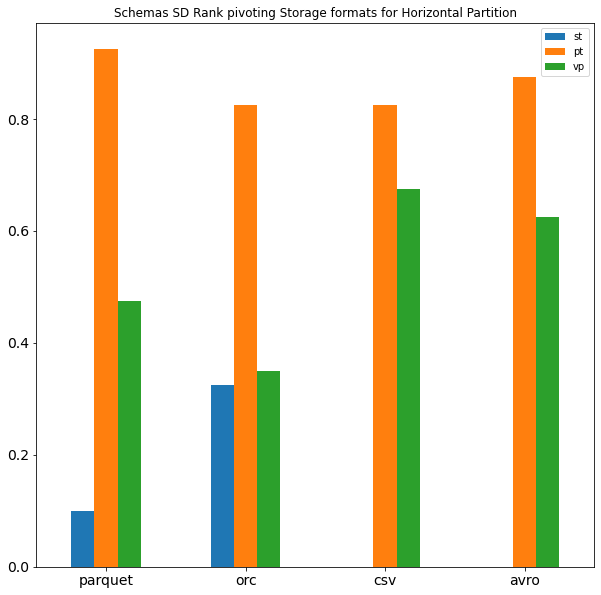

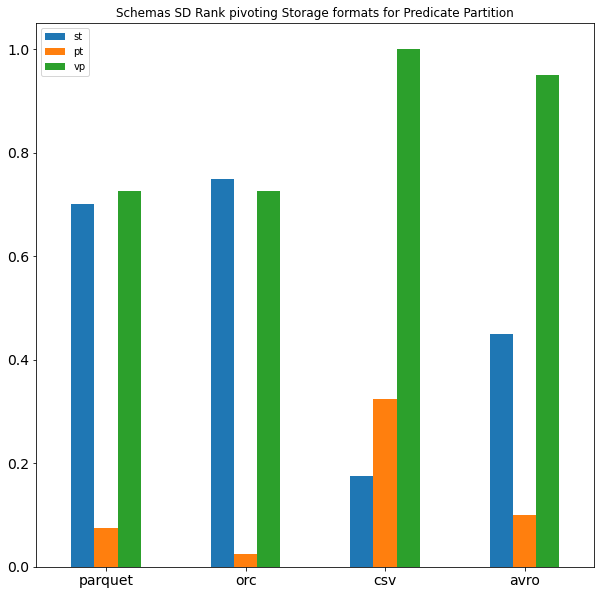

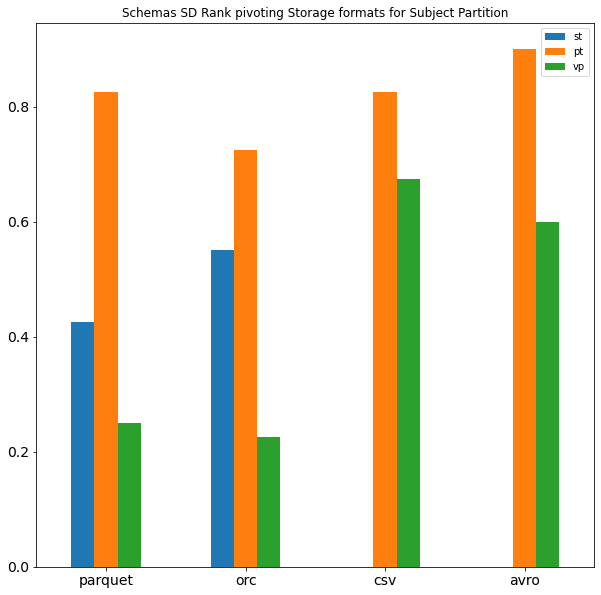

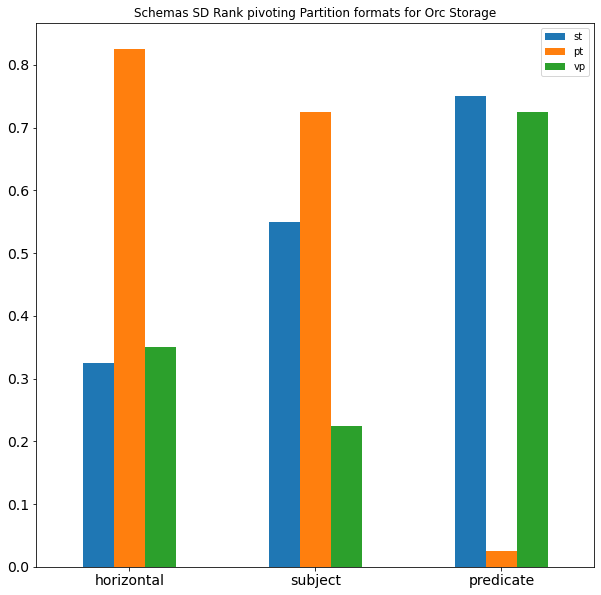

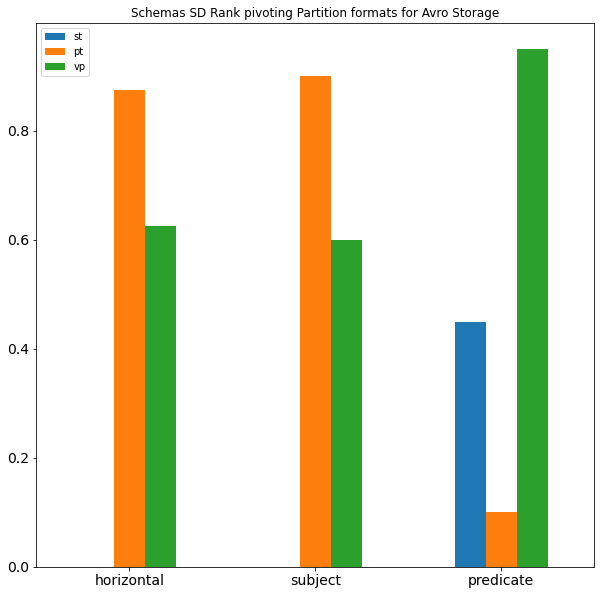

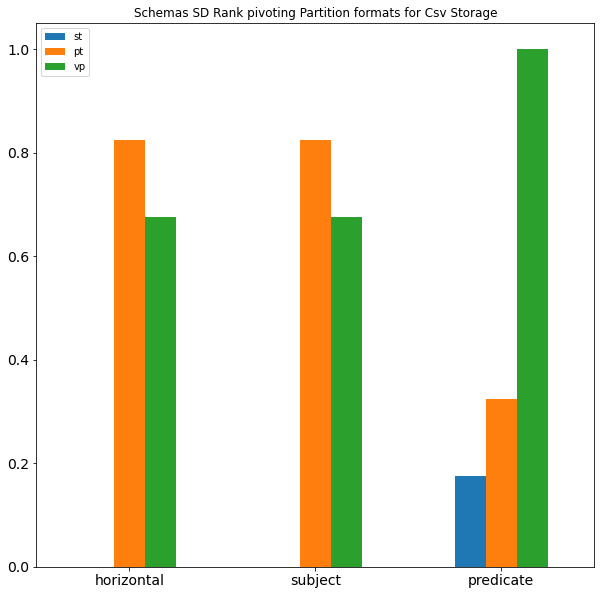

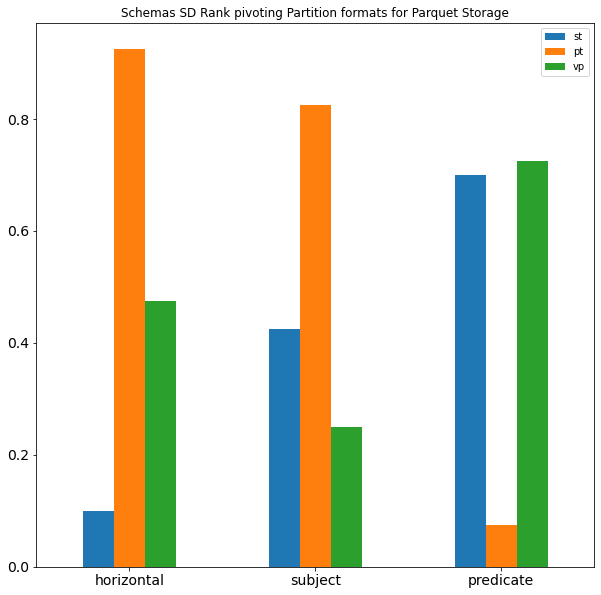

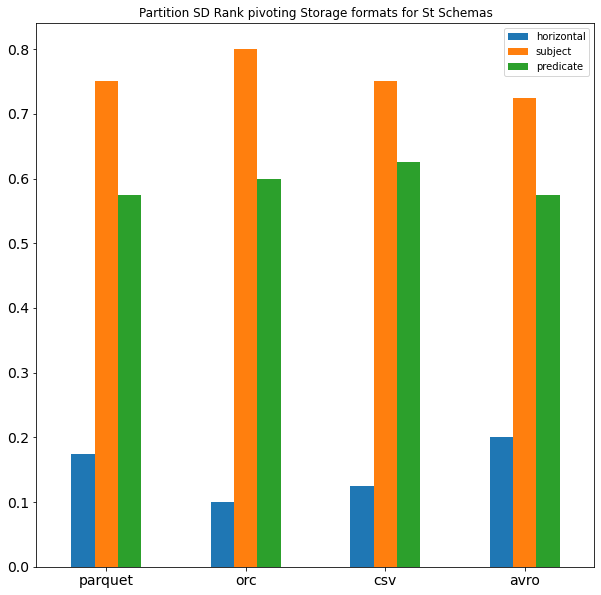

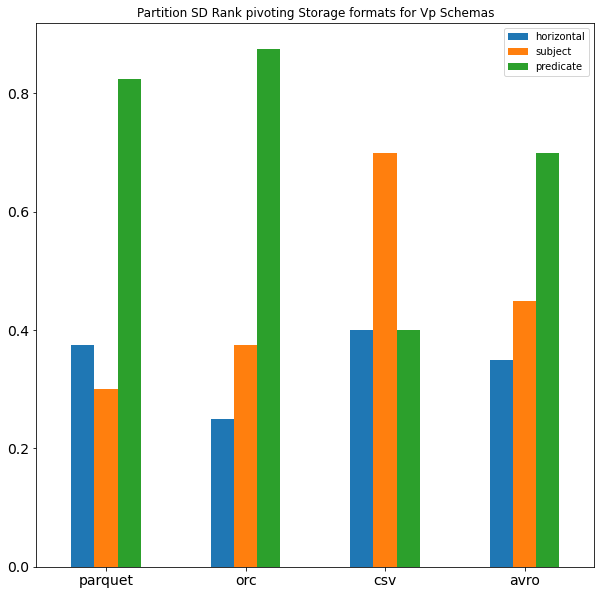

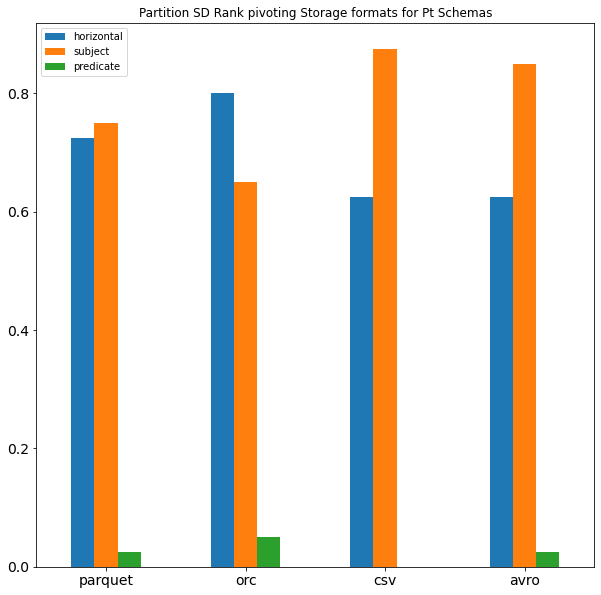

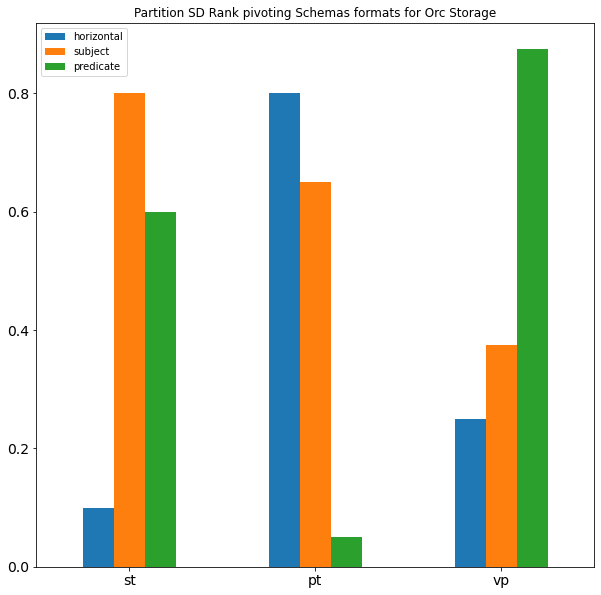

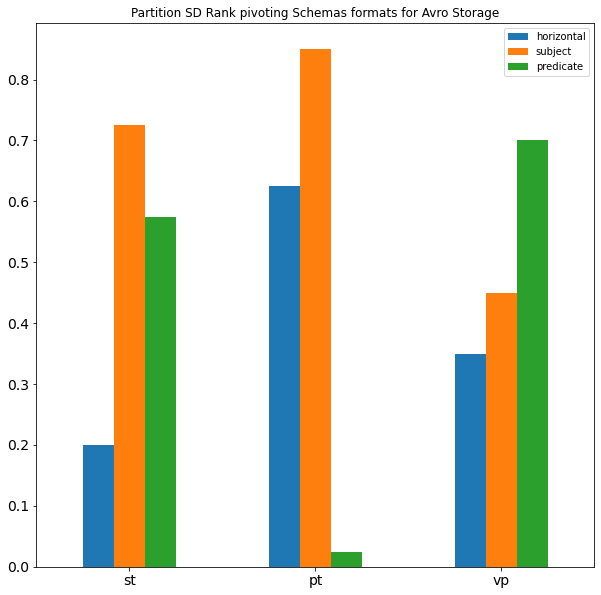

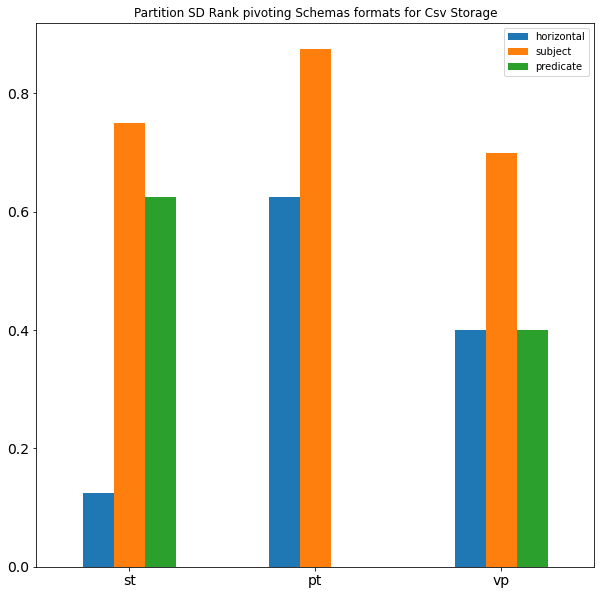

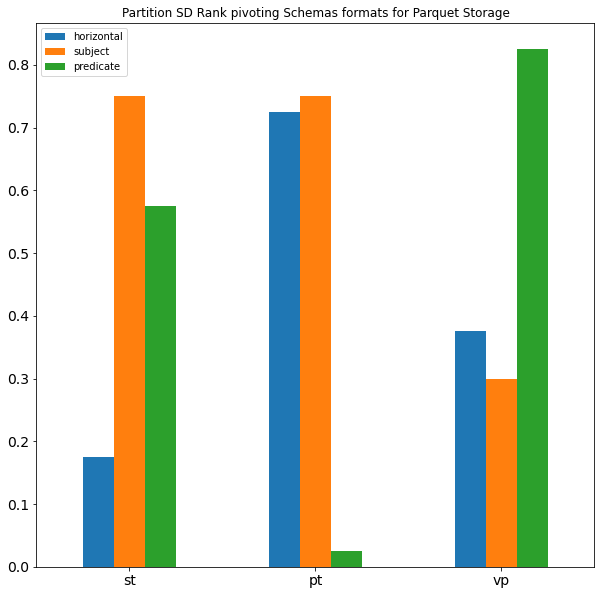

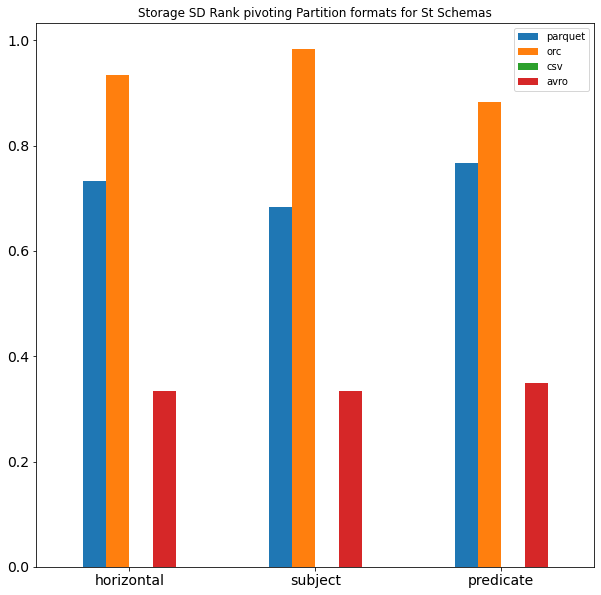

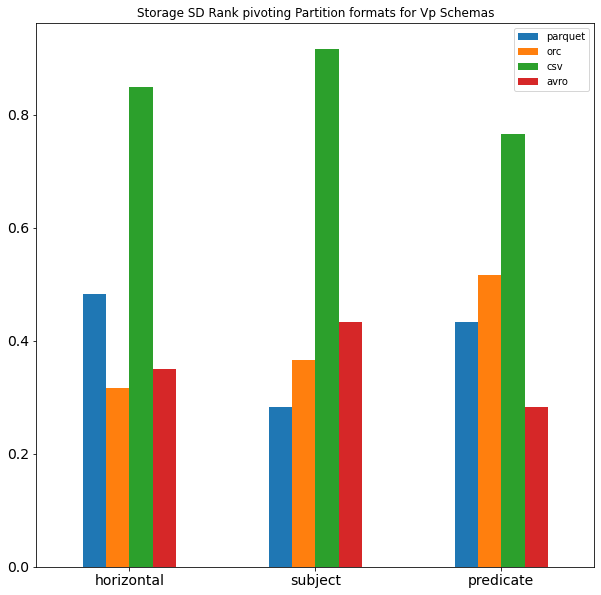

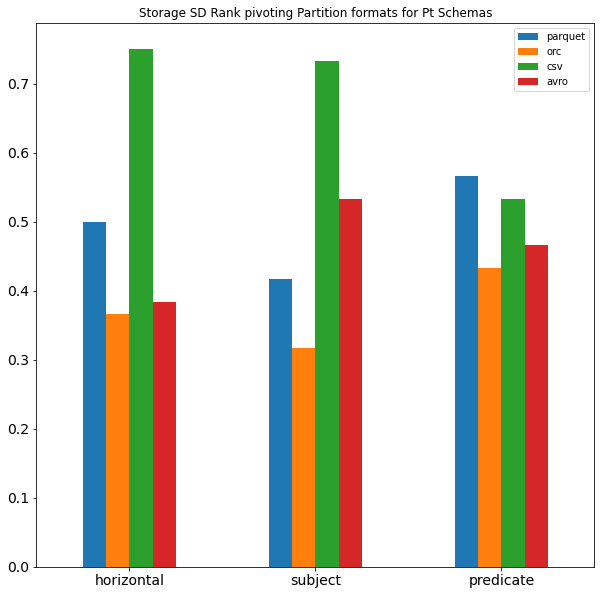

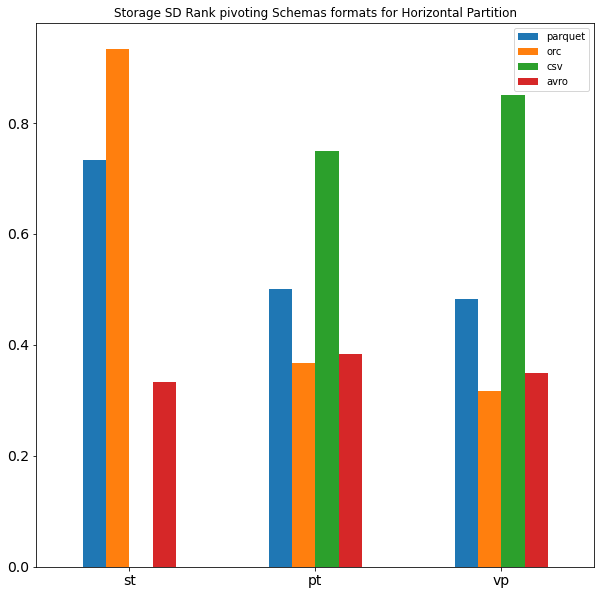

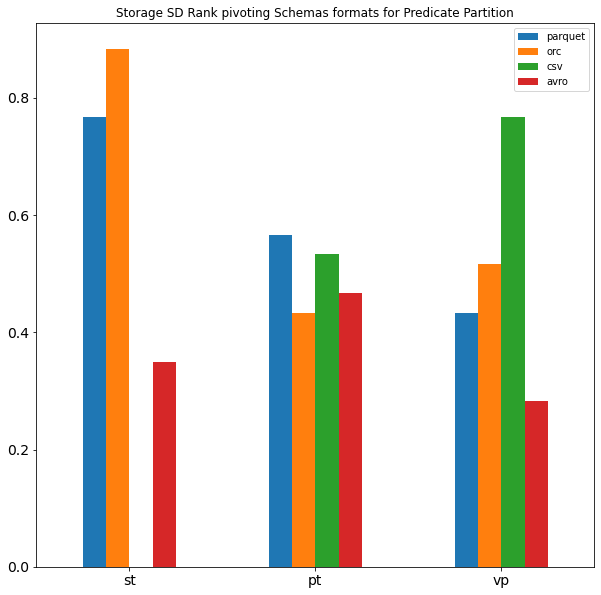

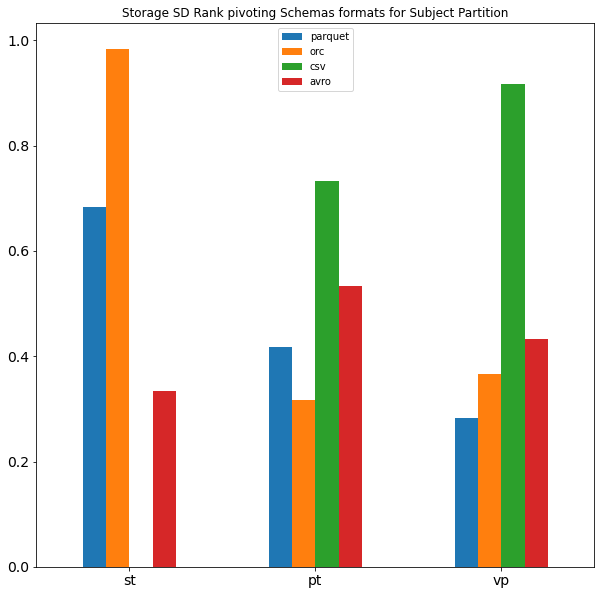

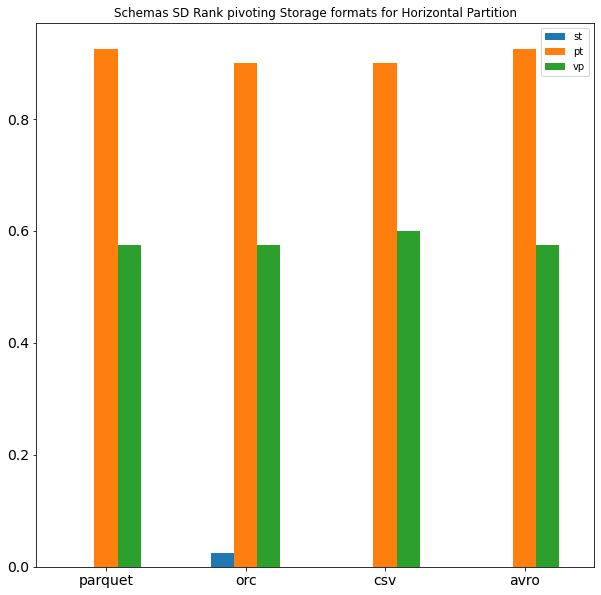

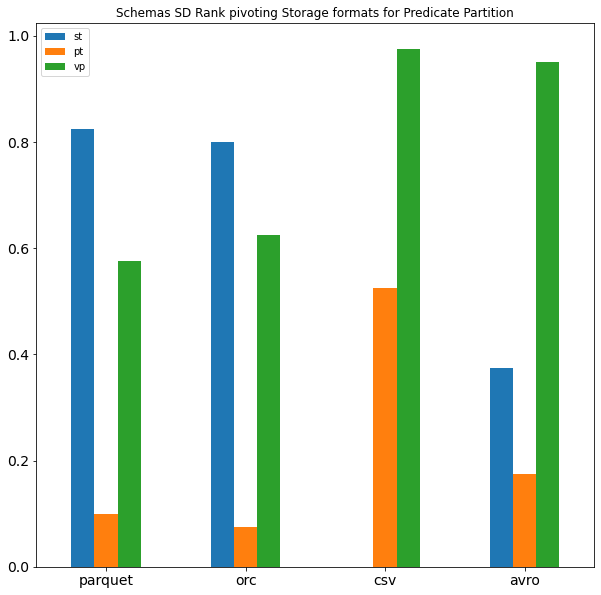

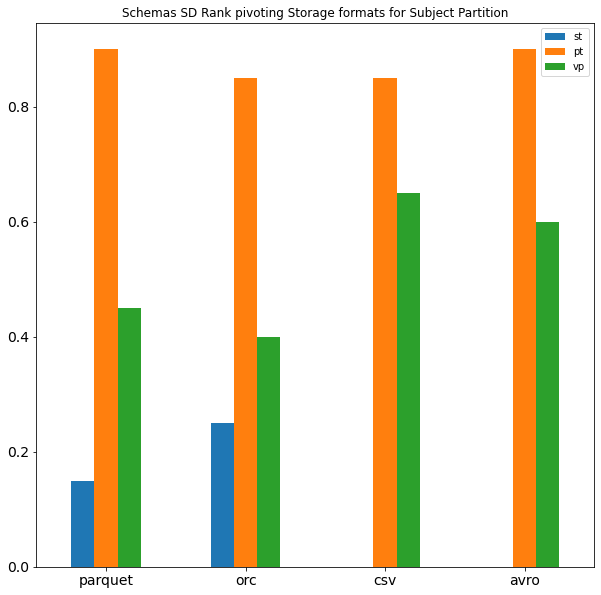

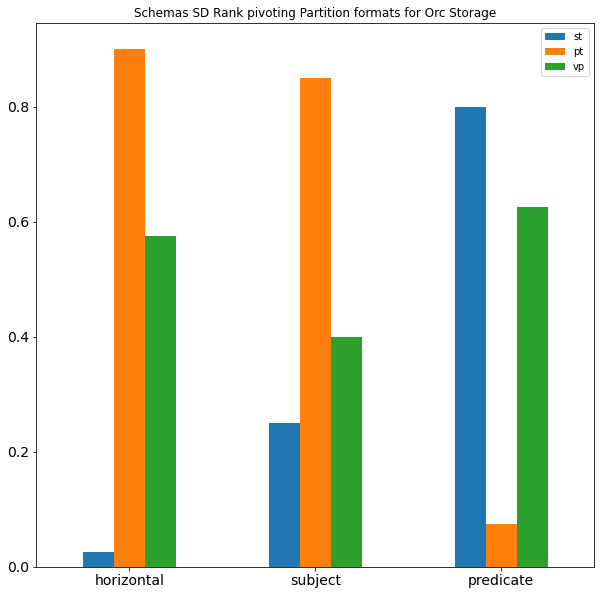

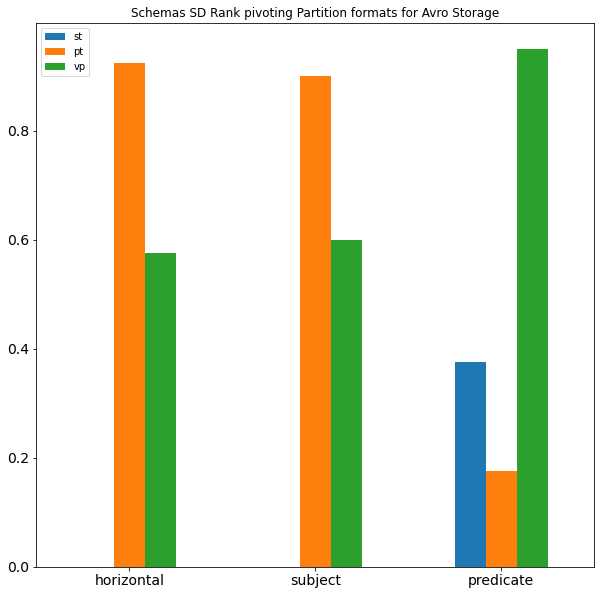

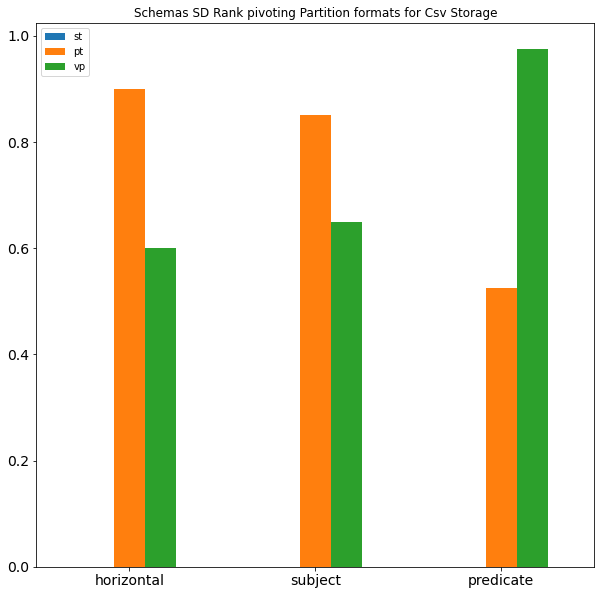

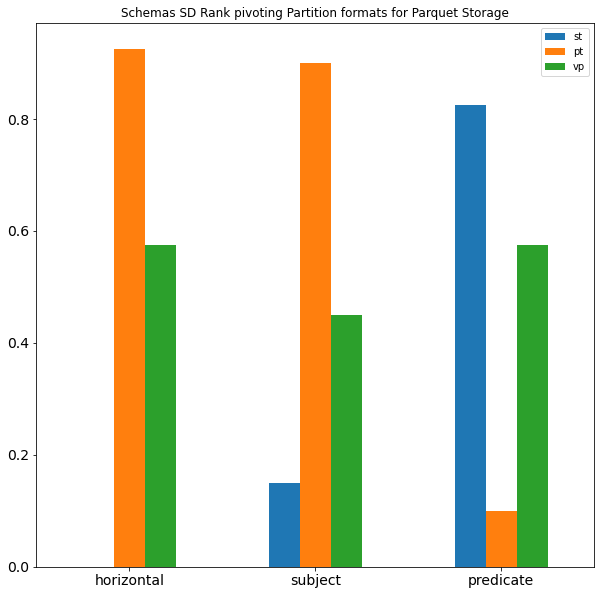

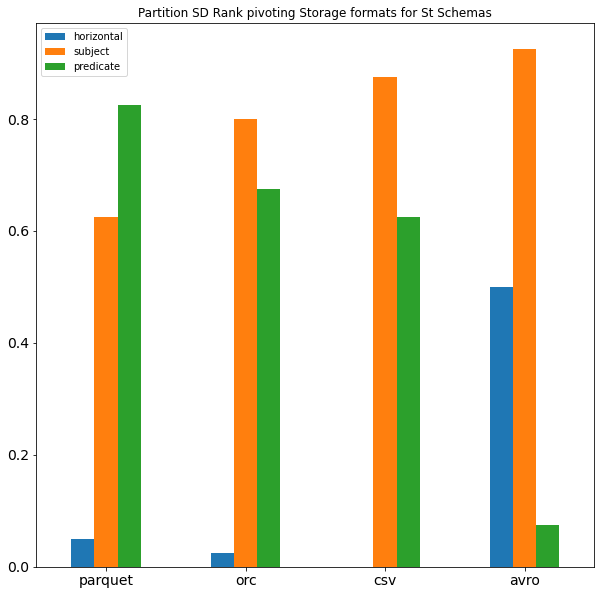

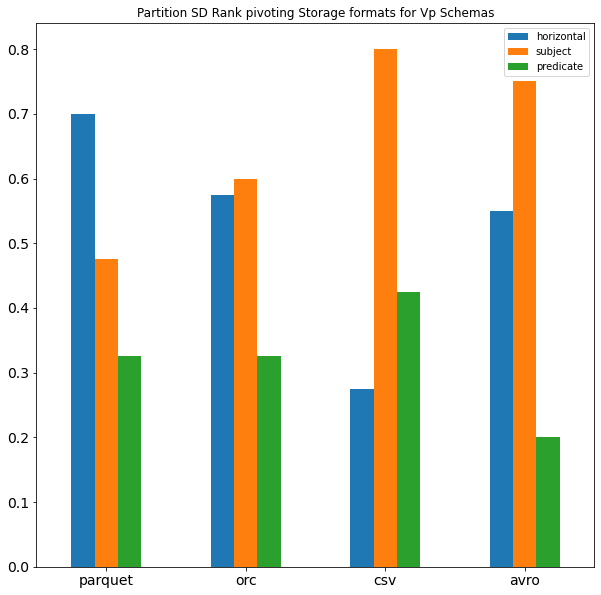

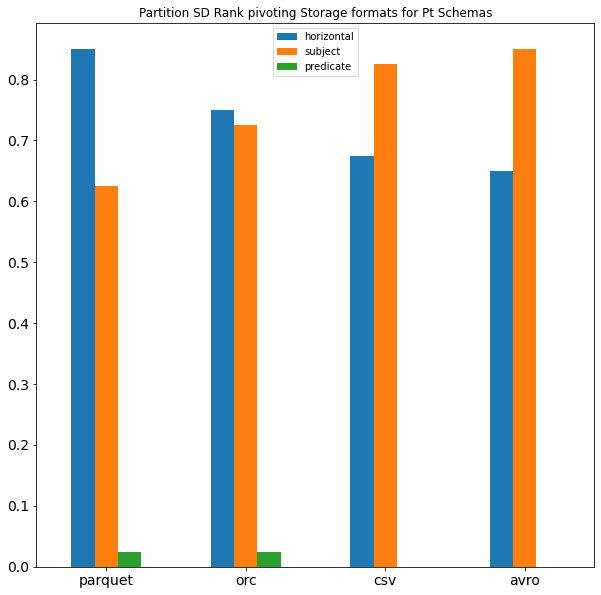

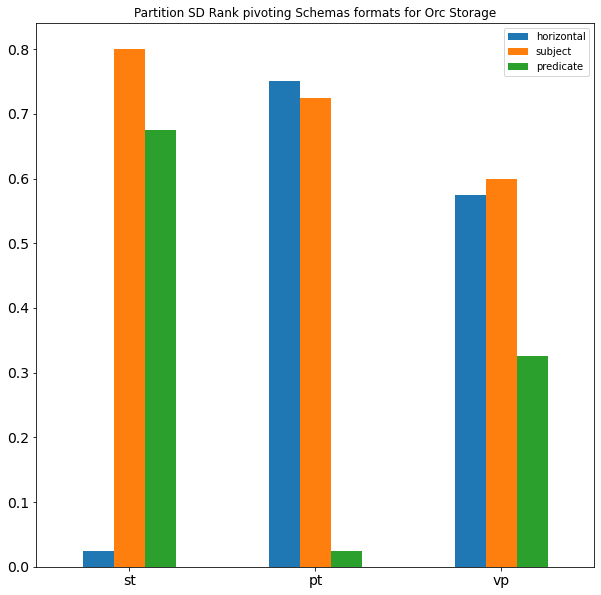

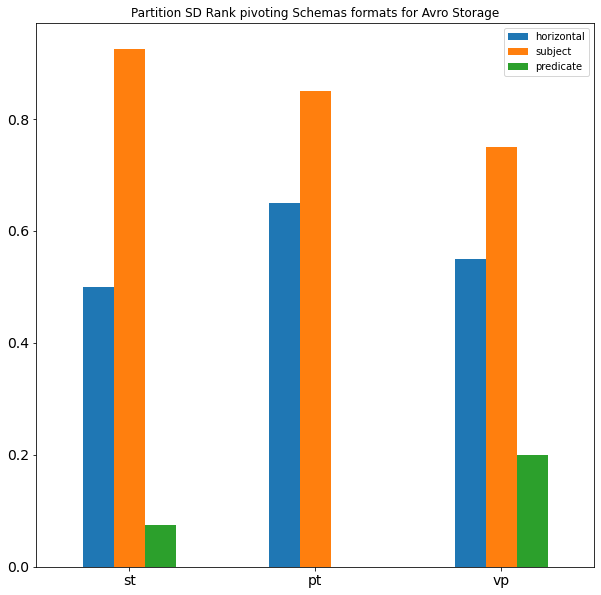

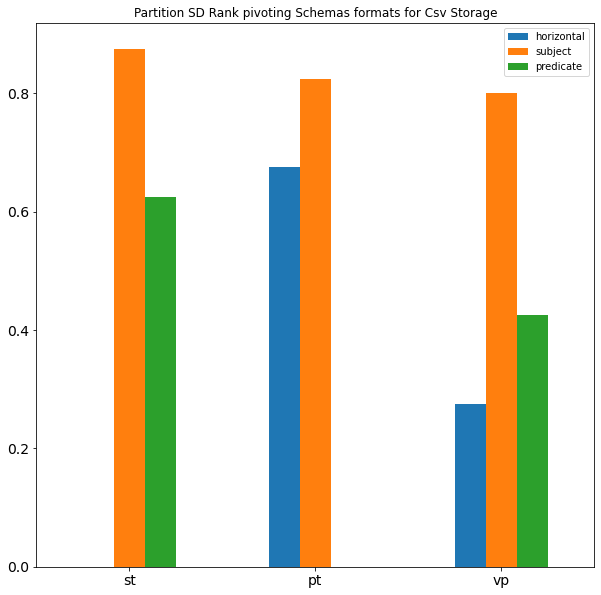

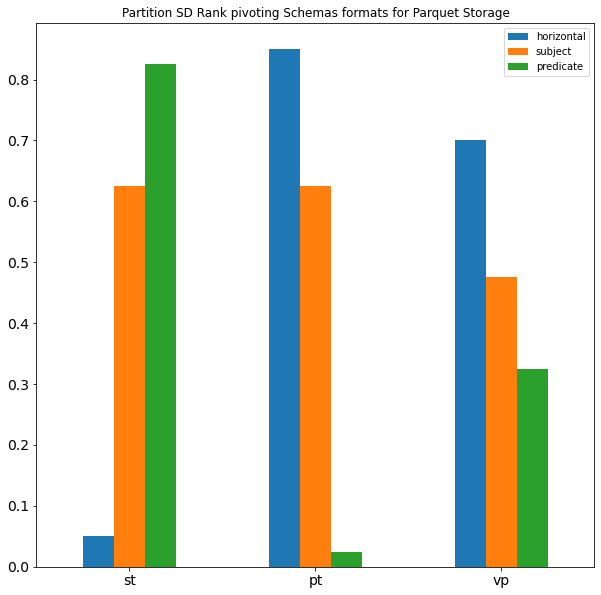

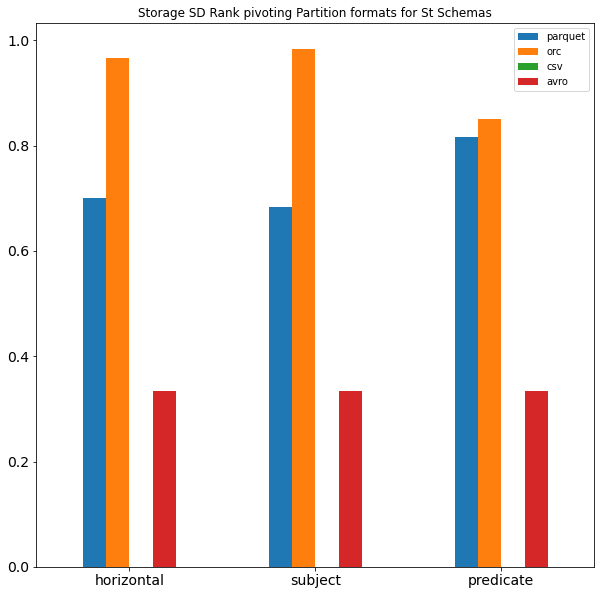

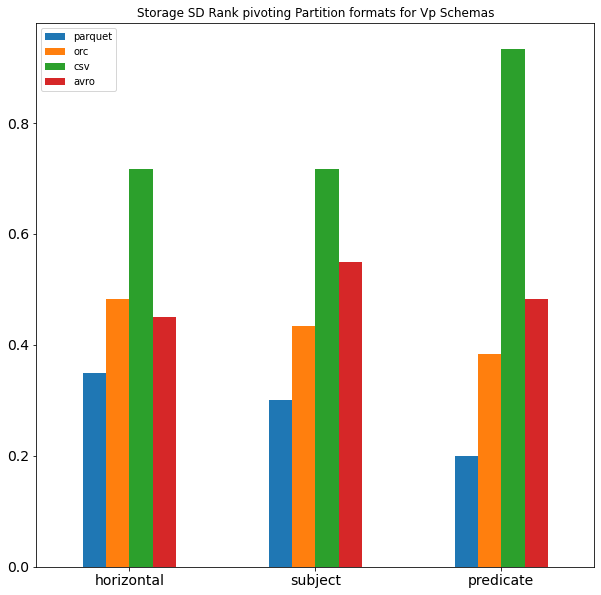

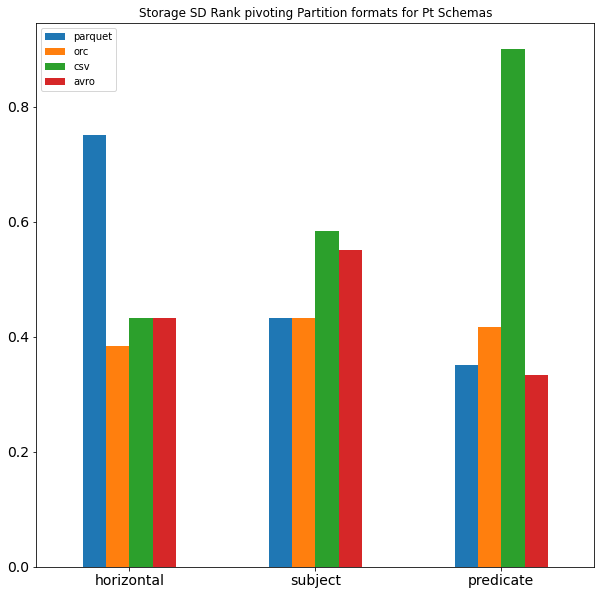

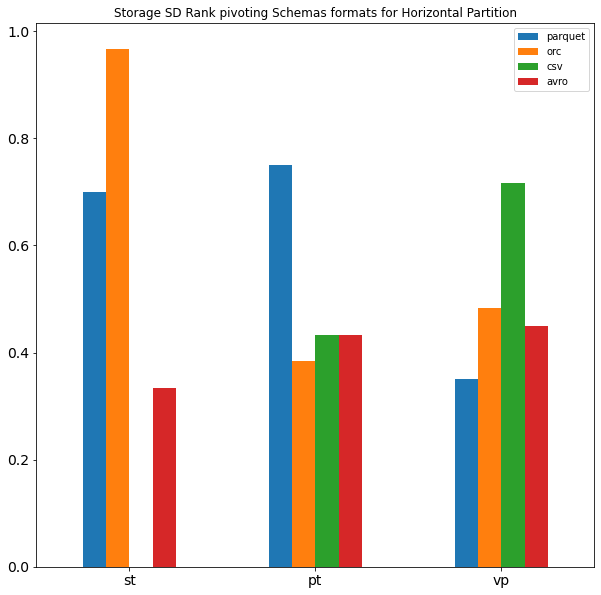

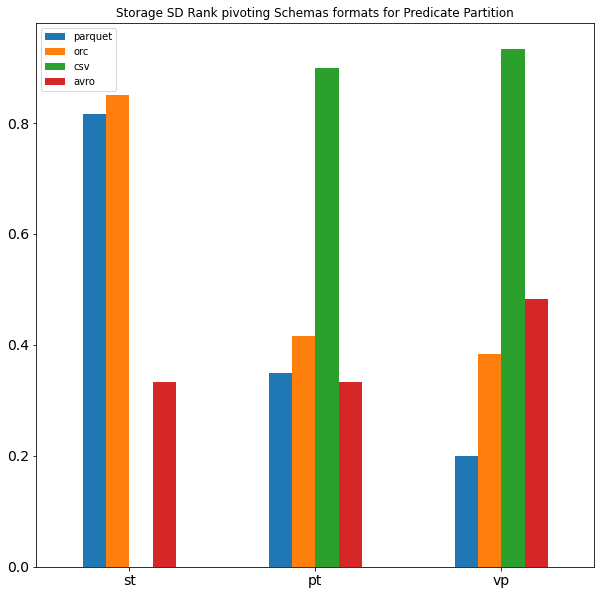

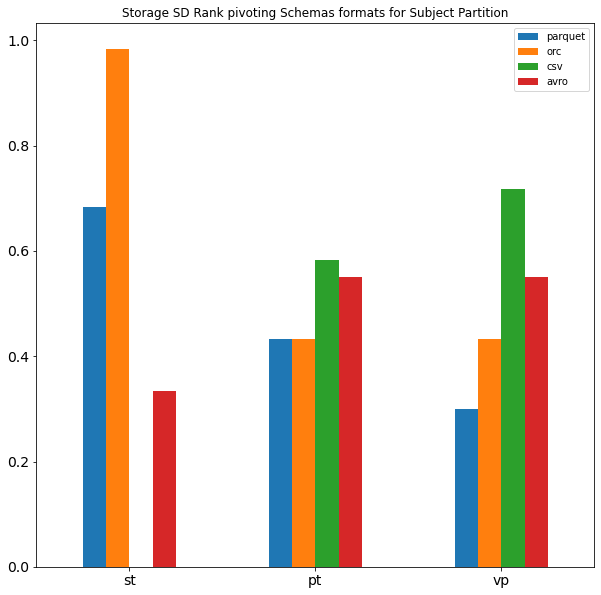

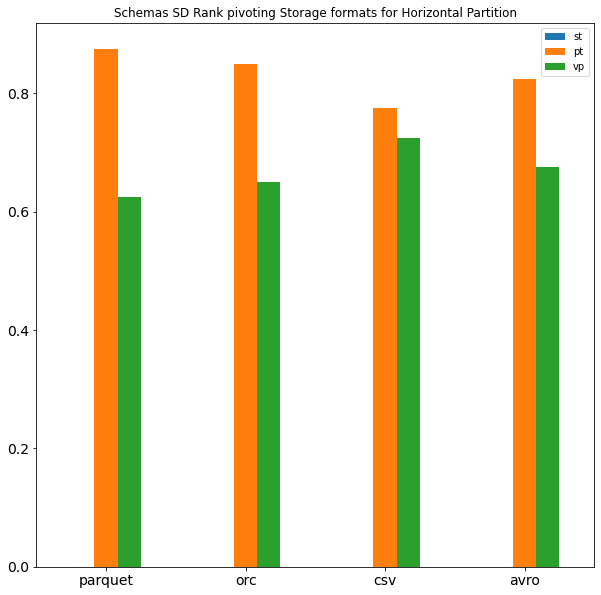

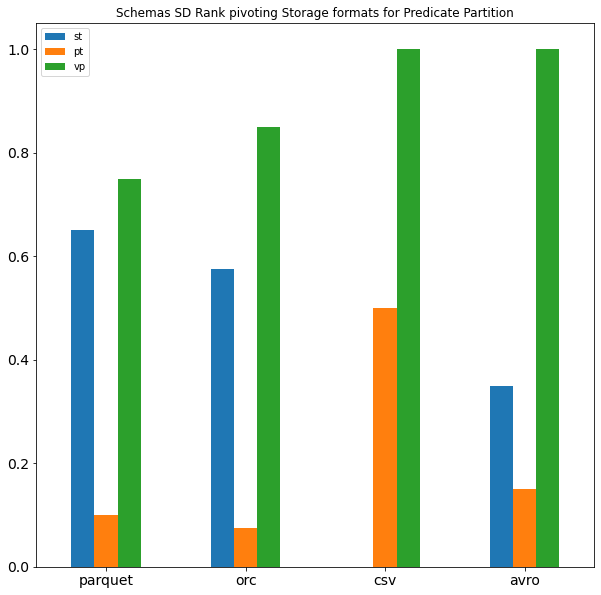

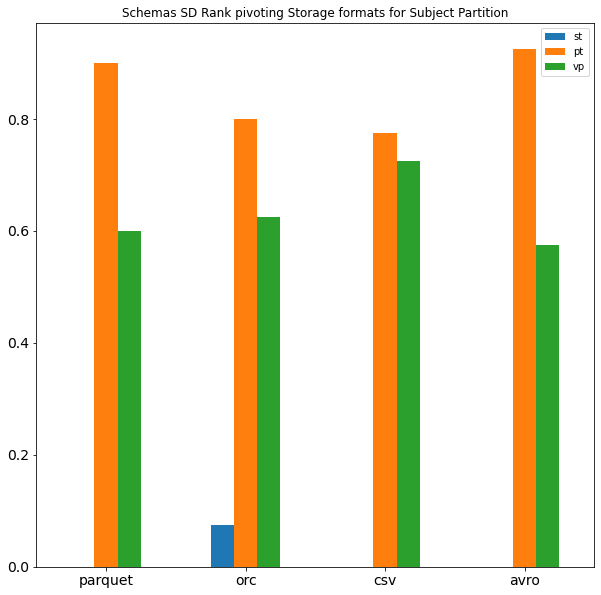

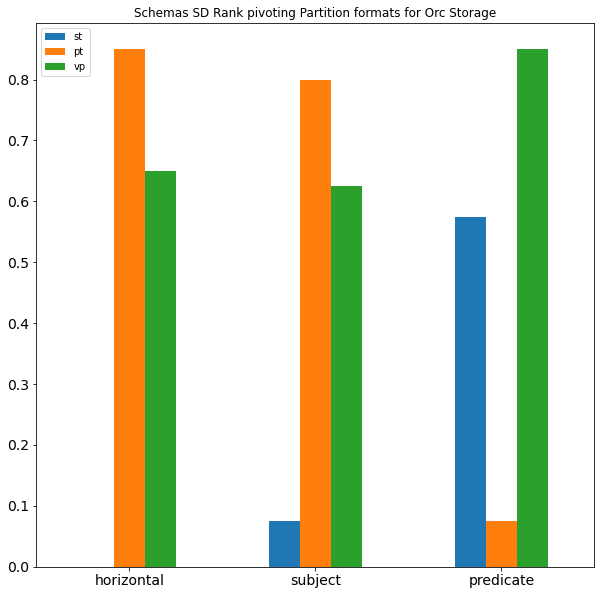

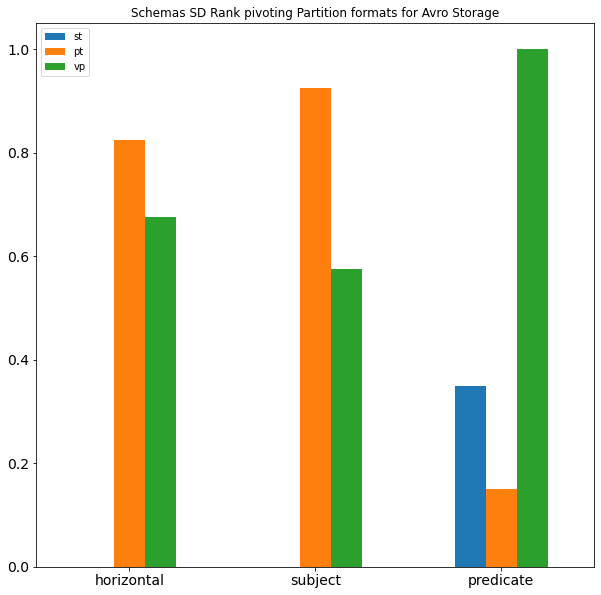

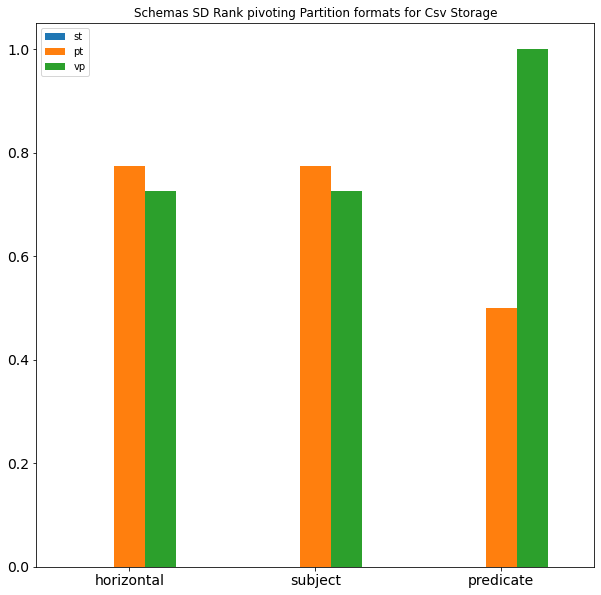

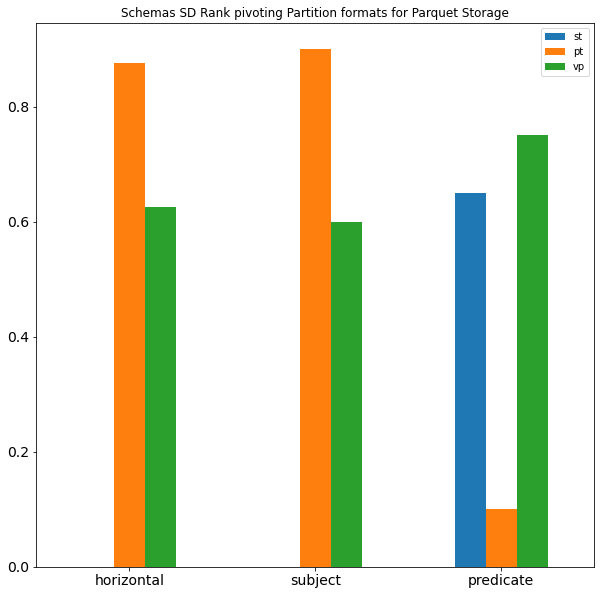

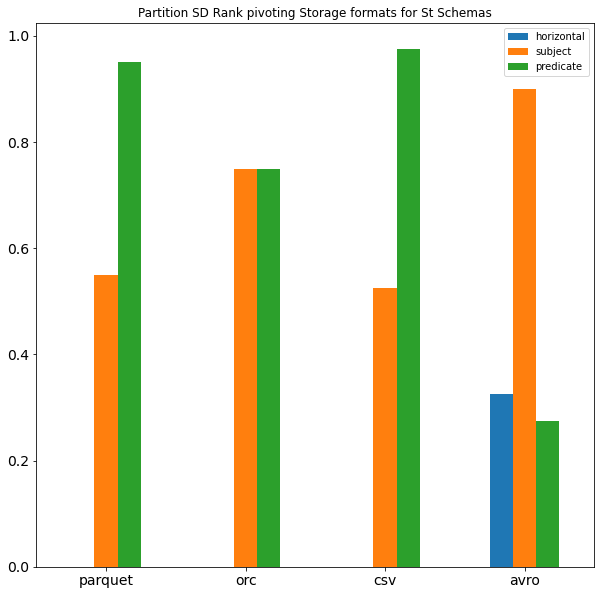

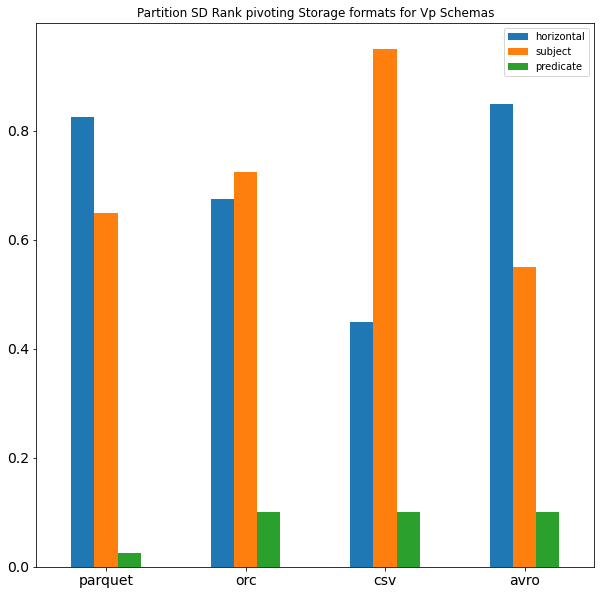

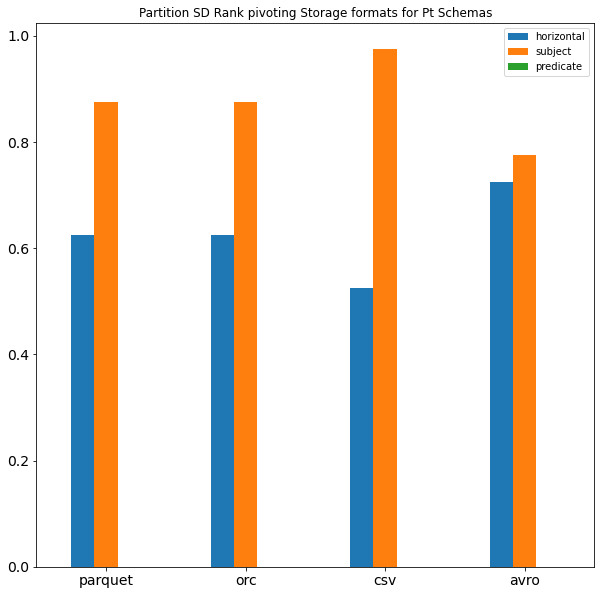

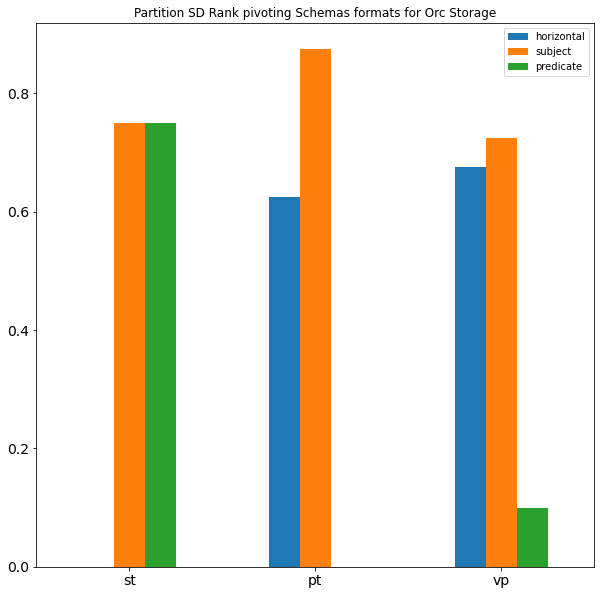

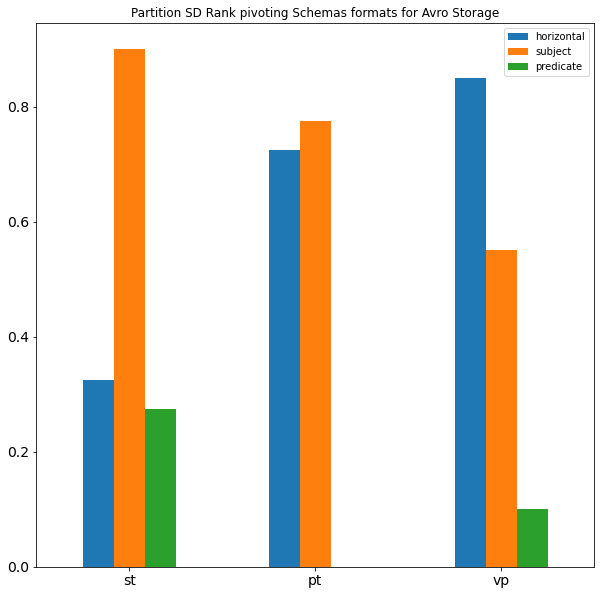

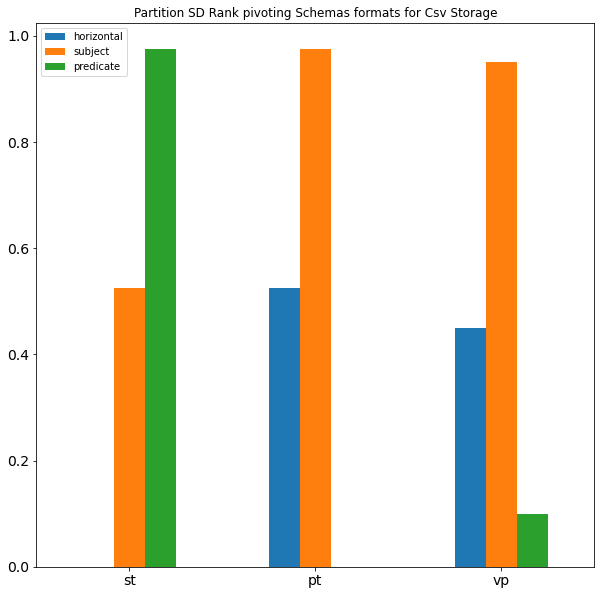

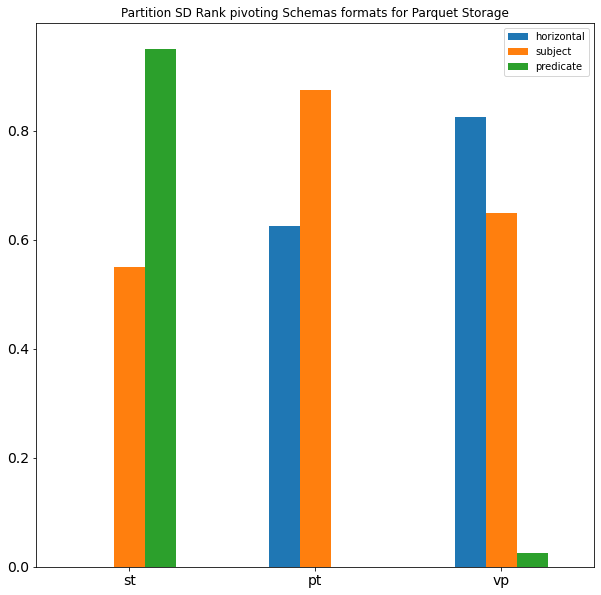

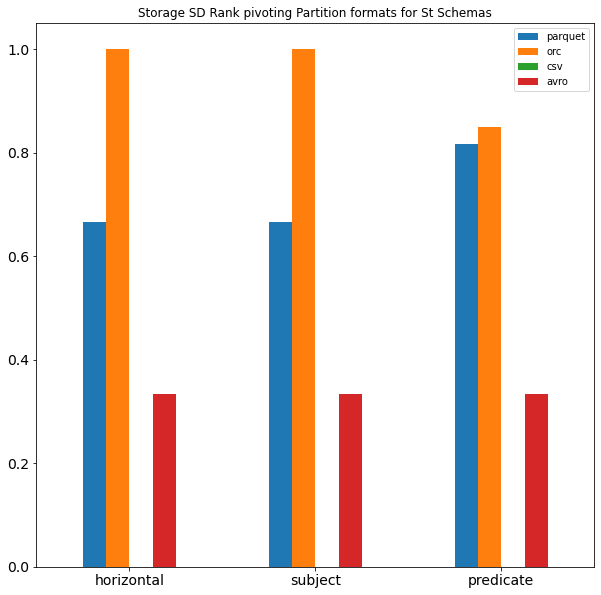

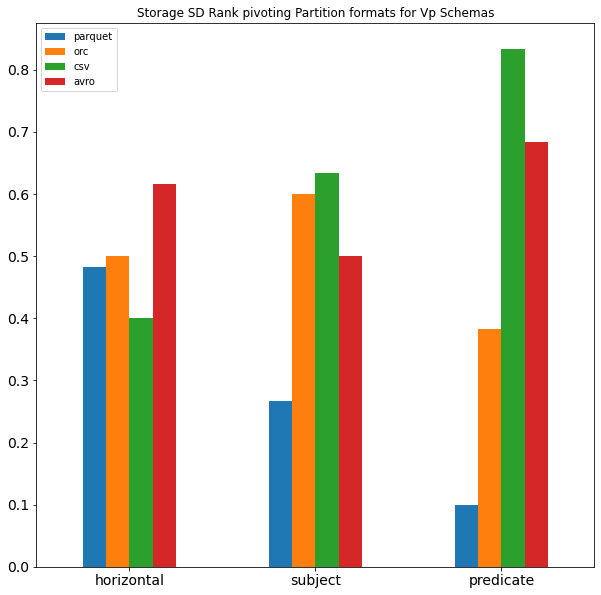

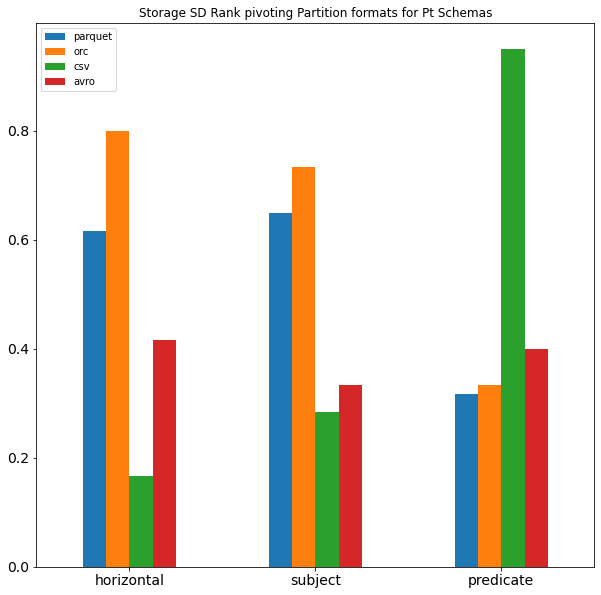

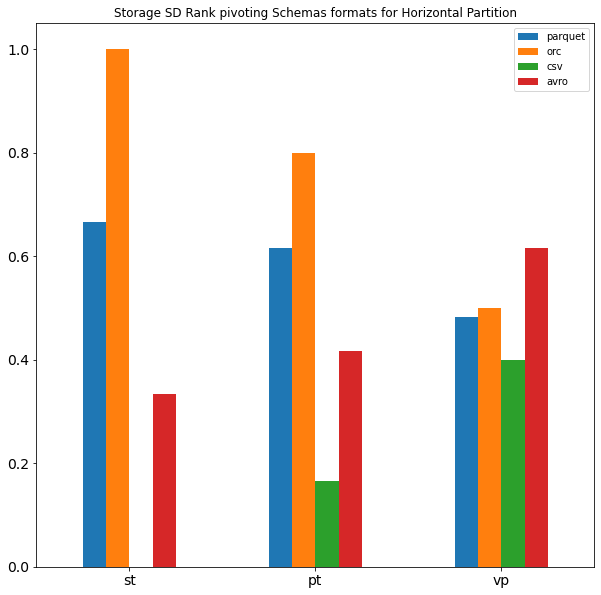

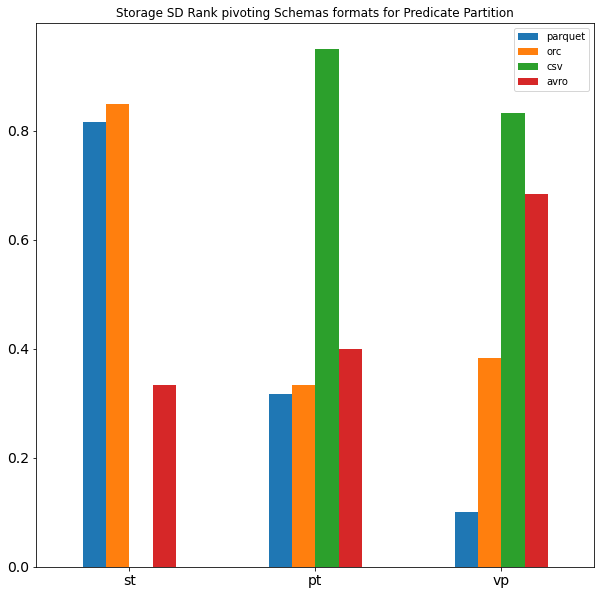

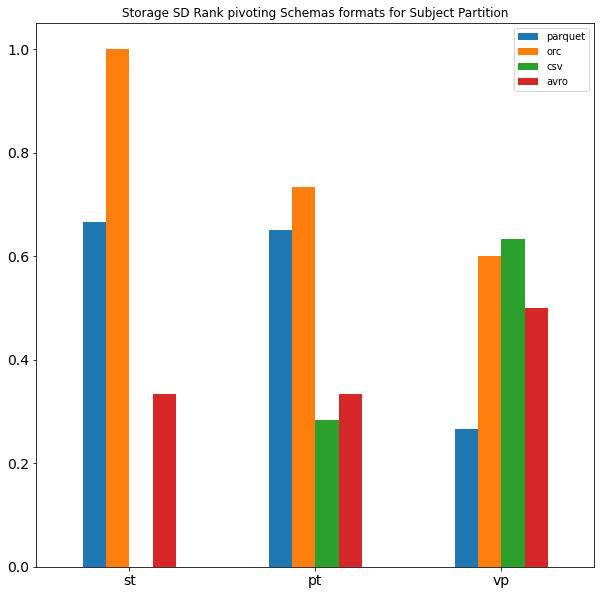

In [18]:
from Rank import SDRank

# example of schema dimension plots
SDRank(config_watdiv, logs_watdiv, '100M', 'schemas').plot('horizontal')
SDRank(config_watdiv, logs_watdiv, '100M', 'schemas').plot('predicate')
SDRank(config_watdiv, logs_watdiv, '100M', 'schemas').plot('subject')
SDRank(config_watdiv, logs_watdiv, '100M', 'schemas').plot('orc')
SDRank(config_watdiv, logs_watdiv, '100M', 'schemas').plot('avro')
SDRank(config_watdiv, logs_watdiv, '100M', 'schemas').plot('csv')
SDRank(config_watdiv, logs_watdiv, '100M', 'schemas').plot('parquet')
SDRank(config_watdiv, logs_watdiv, '100M', 'partition').plot('st')
SDRank(config_watdiv, logs_watdiv, '100M', 'partition').plot('vp')
SDRank(config_watdiv, logs_watdiv, '100M', 'partition').plot('pt')
SDRank(config_watdiv, logs_watdiv, '100M', 'partition').plot('extvp')
SDRank(config_watdiv, logs_watdiv, '100M', 'partition').plot('wpt')
SDRank(config_watdiv, logs_watdiv, '100M', 'partition').plot('orc')
SDRank(config_watdiv, logs_watdiv, '100M', 'partition').plot('avro')
SDRank(config_watdiv, logs_watdiv, '100M', 'partition').plot('csv')
SDRank(config_watdiv, logs_watdiv, '100M', 'partition').plot('parquet')
SDRank(config_watdiv, logs_watdiv, '100M', 'storage').plot('st')
SDRank(config_watdiv, logs_watdiv, '100M', 'storage').plot('vp')
SDRank(config_watdiv, logs_watdiv, '100M', 'storage').plot('pt')
SDRank(config_watdiv, logs_watdiv, '100M', 'storage').plot('extvp')
SDRank(config_watdiv, logs_watdiv, '100M', 'storage').plot('wpt')
SDRank(config_watdiv, logs_watdiv, '100M', 'storage').plot('horizontal')
SDRank(config_watdiv, logs_watdiv, '100M', 'storage').plot('predicate')
SDRank(config_watdiv, logs_watdiv, '100M', 'storage').plot('subject')
SDRank(config_watdiv, logs_watdiv, '250M', 'schemas').plot('horizontal')
SDRank(config_watdiv, logs_watdiv, '250M', 'schemas').plot('predicate')
SDRank(config_watdiv, logs_watdiv, '250M', 'schemas').plot('subject')
SDRank(config_watdiv, logs_watdiv, '250M', 'schemas').plot('orc')
SDRank(config_watdiv, logs_watdiv, '250M', 'schemas').plot('avro')
SDRank(config_watdiv, logs_watdiv, '250M', 'schemas').plot('csv')
SDRank(config_watdiv, logs_watdiv, '250M', 'schemas').plot('parquet')
SDRank(config_watdiv, logs_watdiv, '250M', 'partition').plot('st')
SDRank(config_watdiv, logs_watdiv, '250M', 'partition').plot('vp')
SDRank(config_watdiv, logs_watdiv, '250M', 'partition').plot('pt')
SDRank(config_watdiv, logs_watdiv, '250M', 'partition').plot('extvp')
SDRank(config_watdiv, logs_watdiv, '250M', 'partition').plot('wpt')
SDRank(config_watdiv, logs_watdiv, '250M', 'partition').plot('orc')
SDRank(config_watdiv, logs_watdiv, '250M', 'partition').plot('avro')
SDRank(config_watdiv, logs_watdiv, '250M', 'partition').plot('csv')
SDRank(config_watdiv, logs_watdiv, '250M', 'partition').plot('parquet')
SDRank(config_watdiv, logs_watdiv, '250M', 'storage').plot('st')
SDRank(config_watdiv, logs_watdiv, '250M', 'storage').plot('vp')
SDRank(config_watdiv, logs_watdiv, '250M', 'storage').plot('pt')
SDRank(config_watdiv, logs_watdiv, '250M', 'storage').plot('extvp')
SDRank(config_watdiv, logs_watdiv, '250M', 'storage').plot('wpt')
SDRank(config_watdiv, logs_watdiv, '250M', 'storage').plot('horizontal')
SDRank(config_watdiv, logs_watdiv, '250M', 'storage').plot('predicate')
SDRank(config_watdiv, logs_watdiv, '250M', 'storage').plot('subject')
SDRank(config_watdiv, logs_watdiv, '500M', 'schemas').plot('horizontal')
SDRank(config_watdiv, logs_watdiv, '500M', 'schemas').plot('predicate')
SDRank(config_watdiv, logs_watdiv, '500M', 'schemas').plot('subject')
SDRank(config_watdiv, logs_watdiv, '500M', 'schemas').plot('orc')
SDRank(config_watdiv, logs_watdiv, '500M', 'schemas').plot('avro')
SDRank(config_watdiv, logs_watdiv, '500M', 'schemas').plot('csv')
SDRank(config_watdiv, logs_watdiv, '500M', 'schemas').plot('parquet')
SDRank(config_watdiv, logs_watdiv, '500M', 'partition').plot('st')
SDRank(config_watdiv, logs_watdiv, '500M', 'partition').plot('vp')
SDRank(config_watdiv, logs_watdiv, '500M', 'partition').plot('pt')
SDRank(config_watdiv, logs_watdiv, '500M', 'partition').plot('extvp')
SDRank(config_watdiv, logs_watdiv, '500M', 'partition').plot('wpt')
SDRank(config_watdiv, logs_watdiv, '500M', 'partition').plot('orc')
SDRank(config_watdiv, logs_watdiv, '500M', 'partition').plot('avro')
SDRank(config_watdiv, logs_watdiv, '500M', 'partition').plot('csv')
SDRank(config_watdiv, logs_watdiv, '500M', 'partition').plot('parquet')
SDRank(config_watdiv, logs_watdiv, '500M', 'storage').plot('st')
SDRank(config_watdiv, logs_watdiv, '500M', 'storage').plot('vp')
SDRank(config_watdiv, logs_watdiv, '500M', 'storage').plot('pt')
SDRank(config_watdiv, logs_watdiv, '500M', 'storage').plot('extvp')
SDRank(config_watdiv, logs_watdiv, '500M', 'storage').plot('wpt')
SDRank(config_watdiv, logs_watdiv, '500M', 'storage').plot('horizontal')
SDRank(config_watdiv, logs_watdiv, '500M', 'storage').plot('predicate')
SDRank(config_watdiv, logs_watdiv, '500M', 'storage').plot('subject')

### Rank.SDRank.plotBox

#### SDRank.<b>plotBox</b>(<i>q = None</i>)
<small>In order to show the distributions of our query runtimes data, we need a box plot diagram to compare these data between queries in our experiment. Box plot can help provide information at a glance, giving us general information about our data</small><br><br>
<small>This method returns a box plot diagram that shows both maximum and minimum runtimes of each individual queries for a particular single dimensional ranking</small><br><br>
<i>Parameters:</i> <br>
&emsp; <b>q : list</b><br>
&emsp;&emsp;<small>This method can take a list of column names that user can specify to choose for plotting to have a more precise box plot diagram. i.e. list of ["Q1", "Q2", "Q3"] will output a <br>
&emsp;&emsp;&ensp;box plot only for those queries </small>

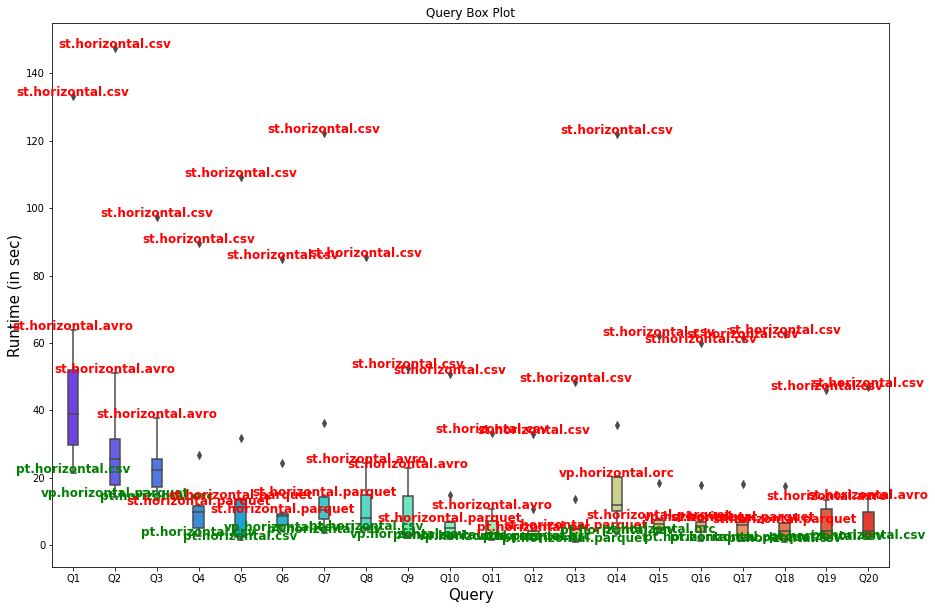

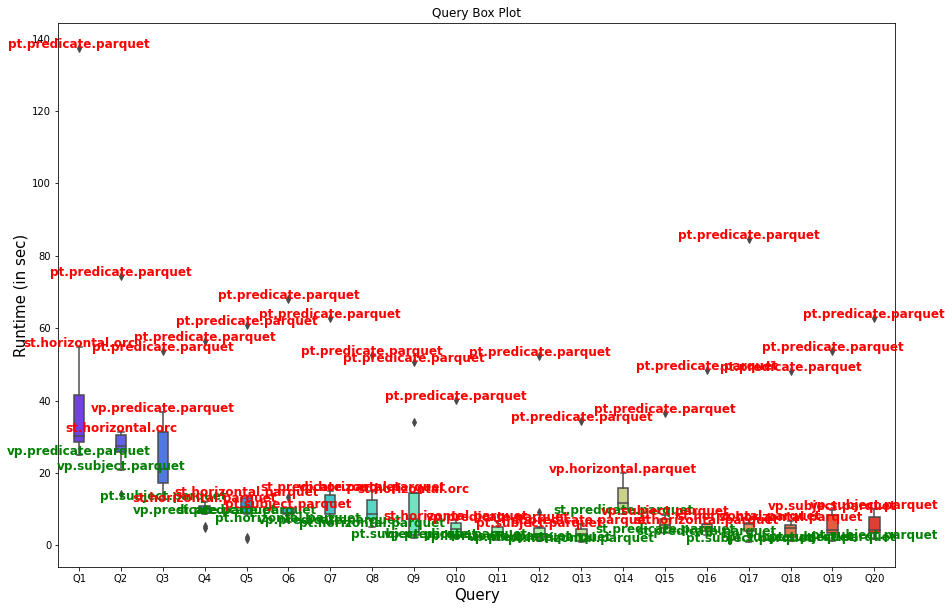

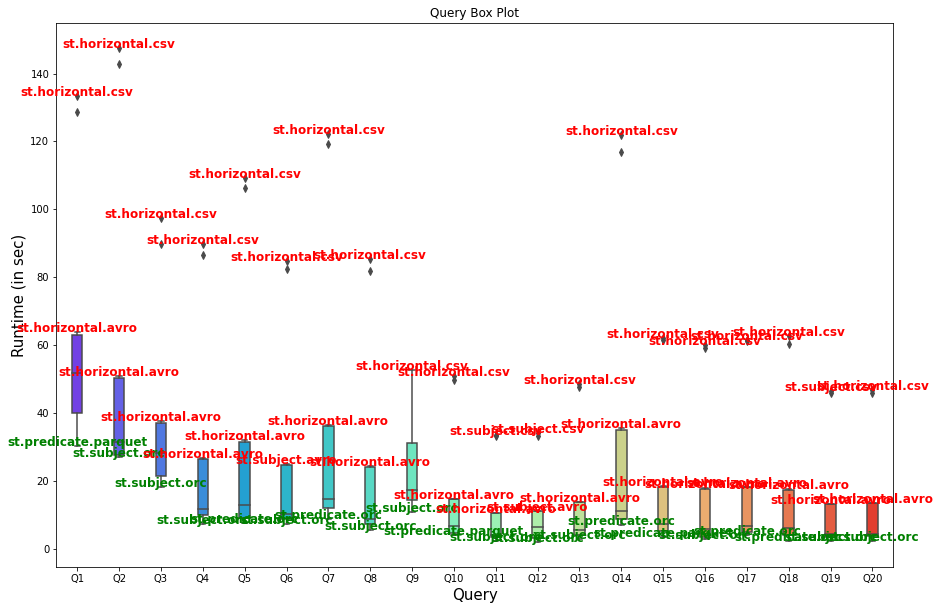

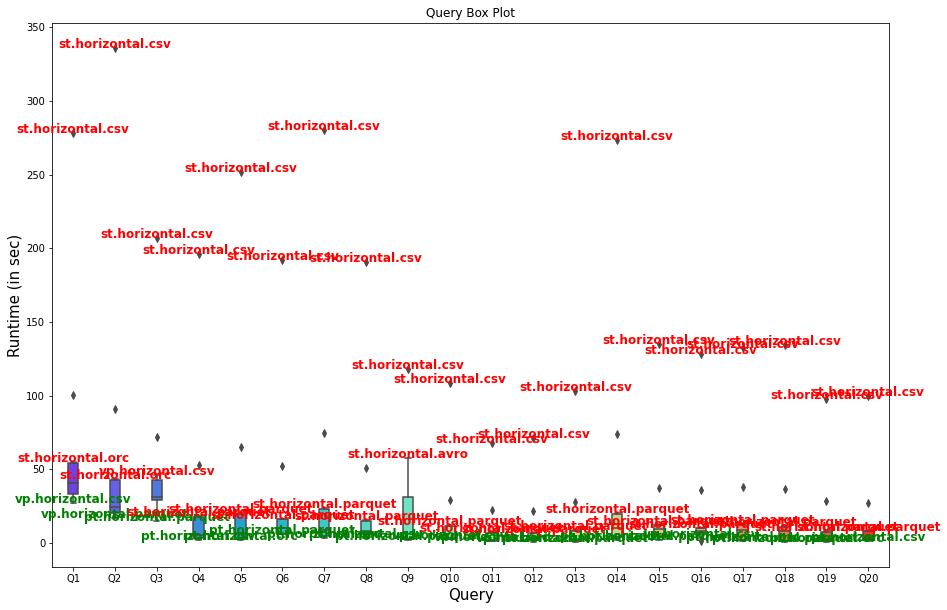

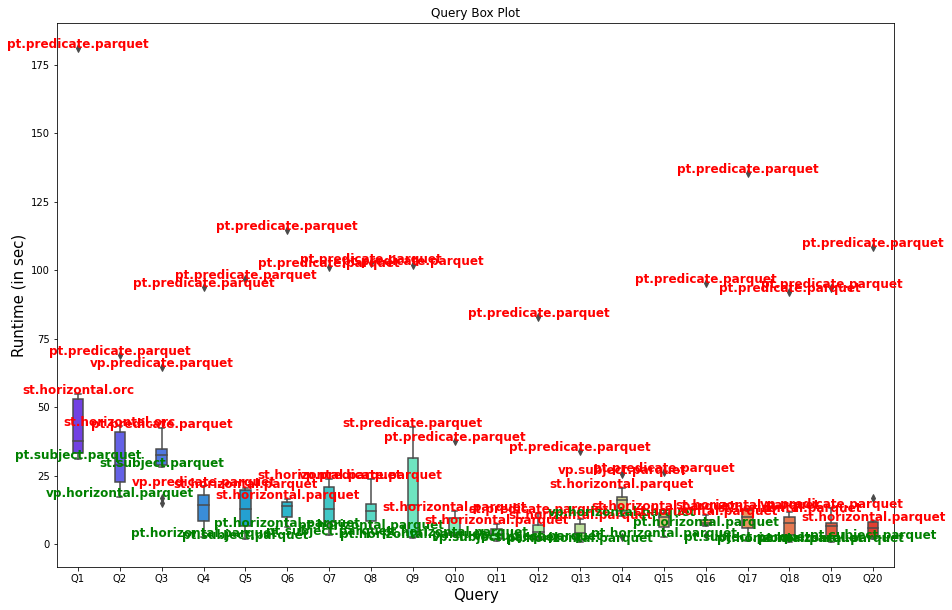

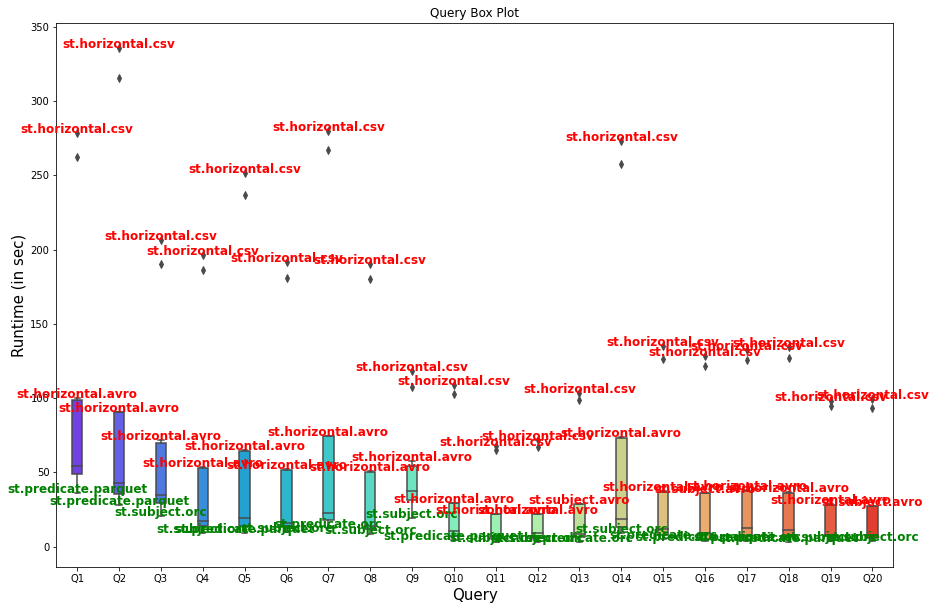

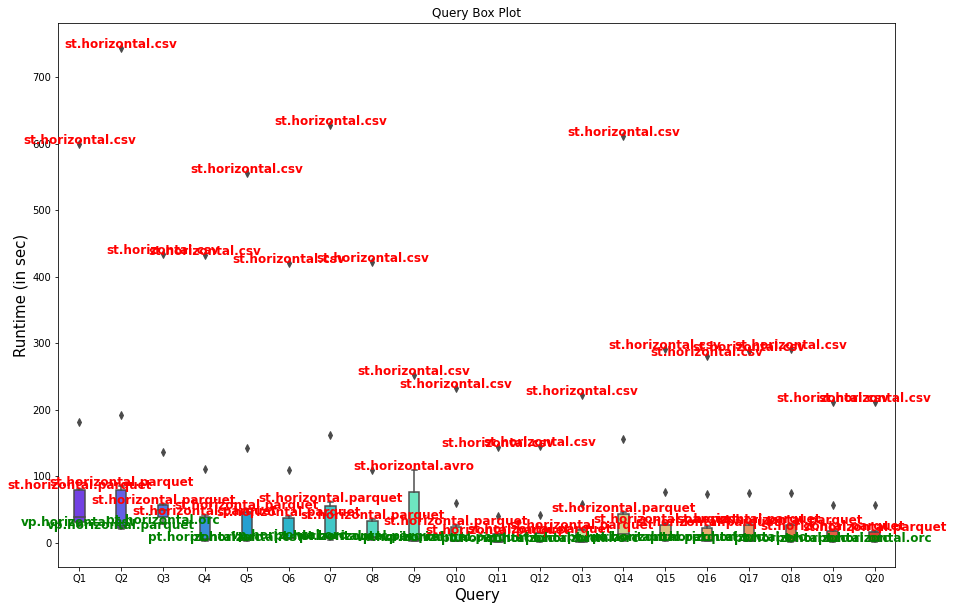

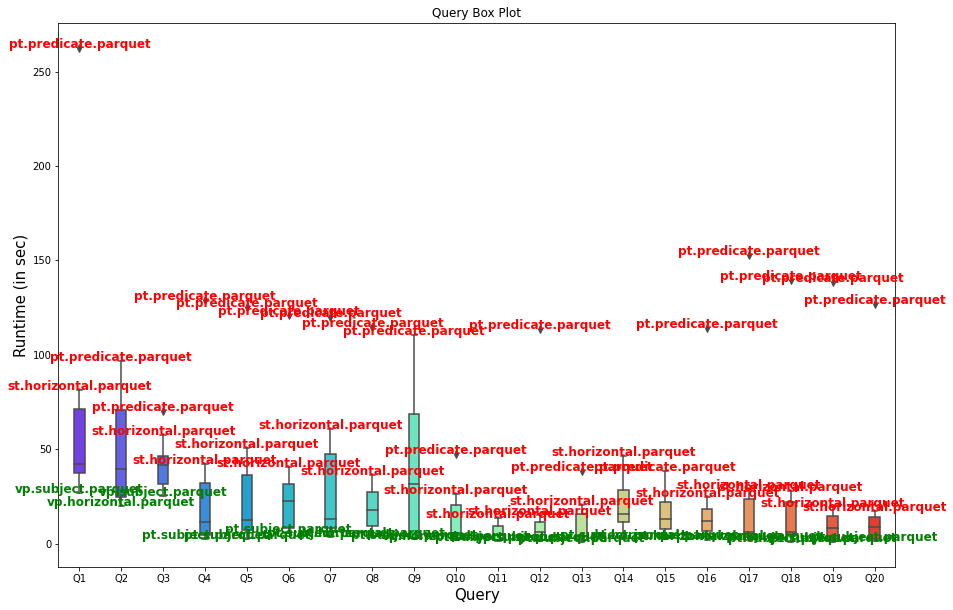

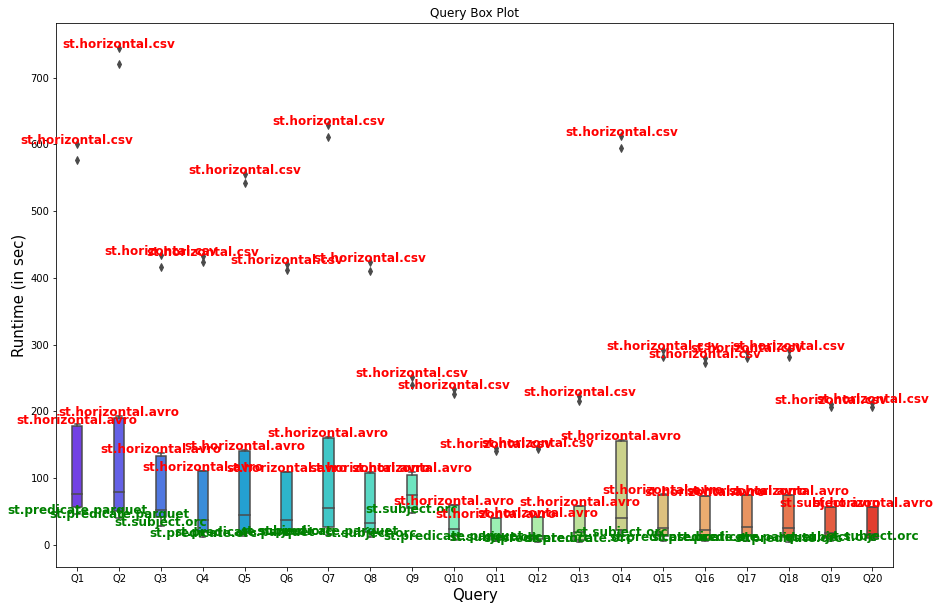

In [19]:
from Rank import SDRank

# Box plot example of all queries of schema ranking dimension
SDRank(config_watdiv, logs_watdiv, '100M', 'schemas').plotBox()
SDRank(config_watdiv, logs_watdiv, '100M', 'partition').plotBox()
SDRank(config_watdiv, logs_watdiv, '100M', 'storage').plotBox()
SDRank(config_watdiv, logs_watdiv, '250M', 'schemas').plotBox()
SDRank(config_watdiv, logs_watdiv, '250M', 'partition').plotBox()
SDRank(config_watdiv, logs_watdiv, '250M', 'storage').plotBox()
SDRank(config_watdiv, logs_watdiv, '500M', 'schemas').plotBox()
SDRank(config_watdiv, logs_watdiv, '500M', 'partition').plotBox()
SDRank(config_watdiv, logs_watdiv, '500M', 'storage').plotBox()

### Multi Dimensional Ranking

With the presence of the trade-offs introduced in the single dimensional ranking function, we propose an optimization technique that aims to find the non-dominated solutions or the configuration combinations by optimizing all dimensions at the same time which utilize the NSGA2 Algorithm.<br>
In this experiment, we provide two ways to use the NSGA2 Algorithm:
- The first method is _paretoAgg_ which operates on the single dimensional ranking criteria. This method aims to maximize performance of the three ranks altogether
- The second method is _paretoQ_ which apply the algorithm considering the rank sets obtained by sorting each query results individually. This method aims at minimizing query runtimes of the ranked dimensions

### PAPyA.Rank.MDRank

#### <i>class</i> Rank.<b>SDRank</b>(<i>config_path, log_path, ranking_sets</i>)
<i>Parameters:</i> <br>
&emsp; <b>config_path : str</b><br>
&emsp;&emsp;<small>Specify the path to your configuration file(s). <i>i.e ./UIModule/settings_watdiv.yaml</small></i><br>
&emsp;<b>log_path : str</b><br>
&emsp;&emsp;<small>Specify the path to your log file(s). <i>i.e ./UI Module/log_watdiv</small></i><br>
&emsp;<b>ranking_sets : str</b><br>
&emsp;&emsp;<small>Ranking sets of user choice. <i>i.e dataset sizes (100M)</small></i><br>

In [20]:
from Rank import MDRank

# example of MDRank class with 100M dataset size as ranking set of the experiment
multiDimensionRank_100M = MDRank(config_watdiv, logs_watdiv, '100M')
multiDimensionRank_250M = MDRank(config_watdiv, logs_watdiv, '250M')
multiDimensionRank_500M = MDRank(config_watdiv, logs_watdiv, '500M')

### Rank.MDRank.paretoQ

#### MDRank.<b>paretoQ</b>(_q_)
<small>This method returns a table of configuration solutions as well as their dominated ones, according to the Non-Dominated Sorting Algorithm II (NSGA2) that was applied to minimizing query runtimes of the ranked dimensions</small><br><br>
<i>Parameters:</i> <br>
&emsp; <b>q : list</b><br>
&emsp;&emsp;<small>remove some queries out of the ranking calculations. <i>i.e [7,8,9] will remove query <b>7, 8,and 9</b> from the calculation</small></i>

In [21]:
multiDimensionRank_100M.paretoQ()

,Solution,Dominated
0,pt.subject.csv,st.horizontal.orc
1,vp.subject.csv,st.horizontal.parquet
2,pt.horizontal.csv,st.subject.avro
3,vp.predicate.csv,st.predicate.avro
4,vp.horizontal.csv,st.horizontal.avro
5,pt.horizontal.parquet,pt.predicate.csv
6,pt.subject.avro,pt.predicate.parquet
7,pt.subject.parquet,pt.predicate.avro
8,pt.horizontal.avro,pt.predicate.orc
9,pt.horizontal.orc,st.subject.csv


In [22]:
multiDimensionRank_250M.paretoQ([1,2,3])

,Solution,Dominated
0,pt.horizontal.parquet,st.subject.orc
1,pt.subject.avro,st.predicate.orc
2,pt.subject.csv,st.predicate.parquet
3,pt.horizontal.avro,vp.predicate.parquet
4,pt.horizontal.csv,st.subject.parquet
5,pt.horizontal.orc,st.horizontal.orc
6,vp.subject.csv,st.horizontal.parquet
7,pt.subject.orc,pt.predicate.csv
8,pt.subject.parquet,st.subject.avro
9,vp.predicate.csv,st.horizontal.avro


In [23]:
multiDimensionRank_500M.paretoQ()

,Solution,Dominated
0,pt.subject.orc,vp.predicate.csv
1,pt.horizontal.orc,st.predicate.orc
2,pt.subject.parquet,vp.predicate.parquet
3,pt.horizontal.parquet,st.predicate.parquet
4,pt.subject.avro,st.horizontal.orc
5,pt.horizontal.avro,st.subject.parquet
6,vp.horizontal.avro,st.horizontal.parquet
7,pt.subject.csv,pt.predicate.csv
8,vp.subject.csv,st.subject.avro
9,vp.subject.orc,pt.predicate.parquet


### Rank.MDRank.paretoAgg

#### MDRank.<b>paretoAgg</b>(_q_)
<small>This method returns a table of configuration solutions as well as their dominated ones, according to the Non-Dominated Sorting Algorithm II (NSGA2) that was applied on the single dimensional ranking criteria which maximizes the performance of all ranking sets altogether</small><br><br>
<i>Parameters:</i> <br>
&emsp; <b>q : list</b><br>
&emsp;&emsp;<small>remove some queries out of the ranking calculations. <i>i.e [7,8,9] will remove query <b>7, 8,and 9</b> from the calculation</small></i>

In [24]:
multiDimensionRank_100M.paretoAgg()

,Solution,Dominated
0,pt.subject.csv,vp.predicate.orc
1,st.subject.orc,st.predicate.parquet
2,vp.subject.csv,pt.subject.parquet
3,pt.subject.avro,pt.horizontal.orc
4,st.predicate.orc,vp.predicate.parquet
5,pt.horizontal.csv,vp.horizontal.csv
6,vp.predicate.csv,pt.horizontal.avro
7,pt.horizontal.parquet,st.subject.parquet
8,vp.predicate.avro,pt.subject.orc
9,,vp.subject.avro


In [25]:
multiDimensionRank_250M.paretoAgg([2,3,4,5])

,Solution,Dominated
0,pt.horizontal.parquet,pt.subject.avro
1,vp.predicate.csv,vp.subject.csv
2,st.predicate.parquet,pt.horizontal.avro
3,st.predicate.orc,pt.horizontal.orc
4,pt.subject.csv,pt.subject.orc
5,st.subject.orc,vp.subject.avro
6,st.subject.avro,pt.subject.parquet
7,,pt.horizontal.csv
8,,vp.horizontal.csv
9,,vp.predicate.avro


In [26]:
multiDimensionRank_500M.paretoAgg()

,Solution,Dominated
0,pt.subject.parquet,vp.horizontal.avro
1,st.predicate.parquet,pt.horizontal.parquet
2,pt.subject.orc,pt.horizontal.avro
3,vp.subject.csv,vp.subject.orc
4,pt.horizontal.orc,vp.horizontal.parquet
5,st.predicate.orc,vp.horizontal.orc
6,pt.subject.avro,vp.predicate.avro
7,pt.subject.csv,vp.subject.avro
8,vp.predicate.csv,vp.horizontal.csv
9,st.subject.orc,vp.subject.parquet


### Rank.MDRank.plot

#### MDRank.<b>plot</b>()
<small>This method returns a plot for multi dimensional ranking solutions according to paretoAgg as shades of green projected in a three dimensional space</small>

(9, 3) (27, 3)


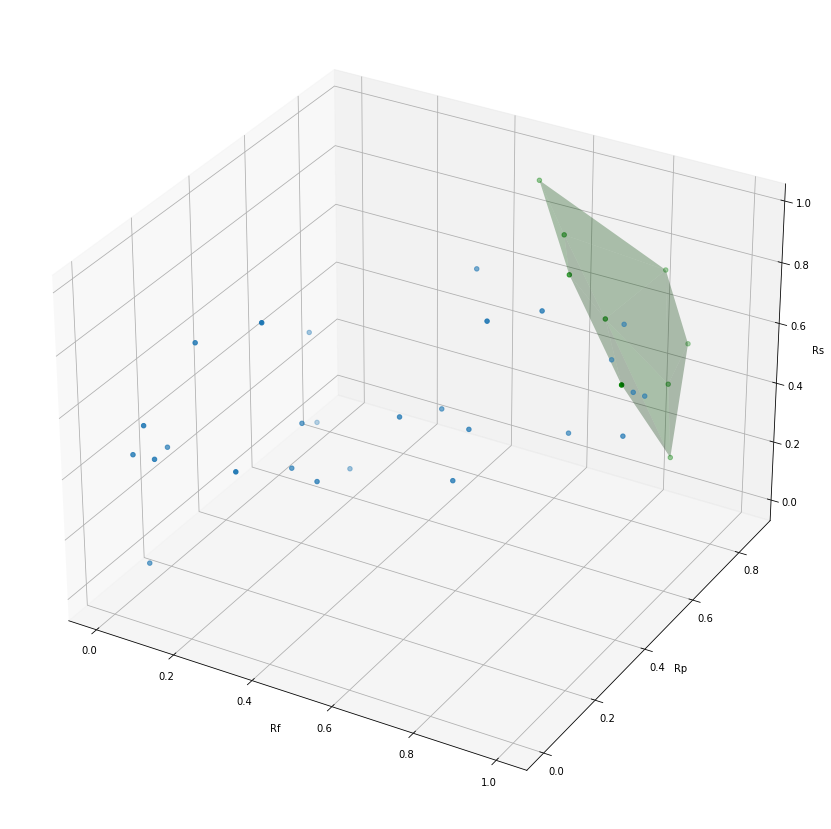

(6, 3) (30, 3)


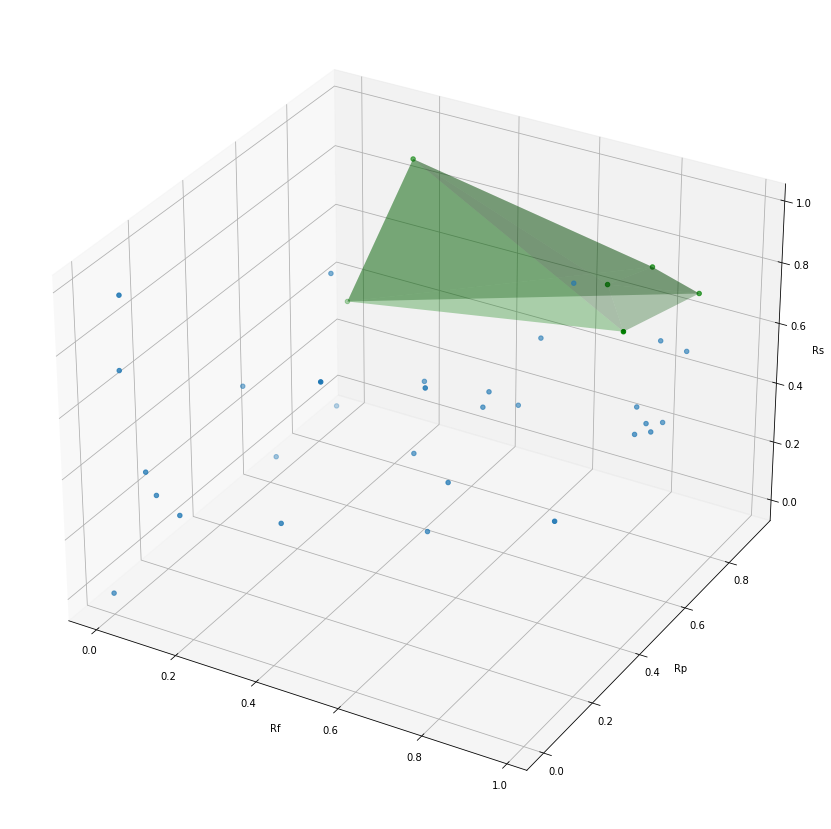

(11, 3) (25, 3)


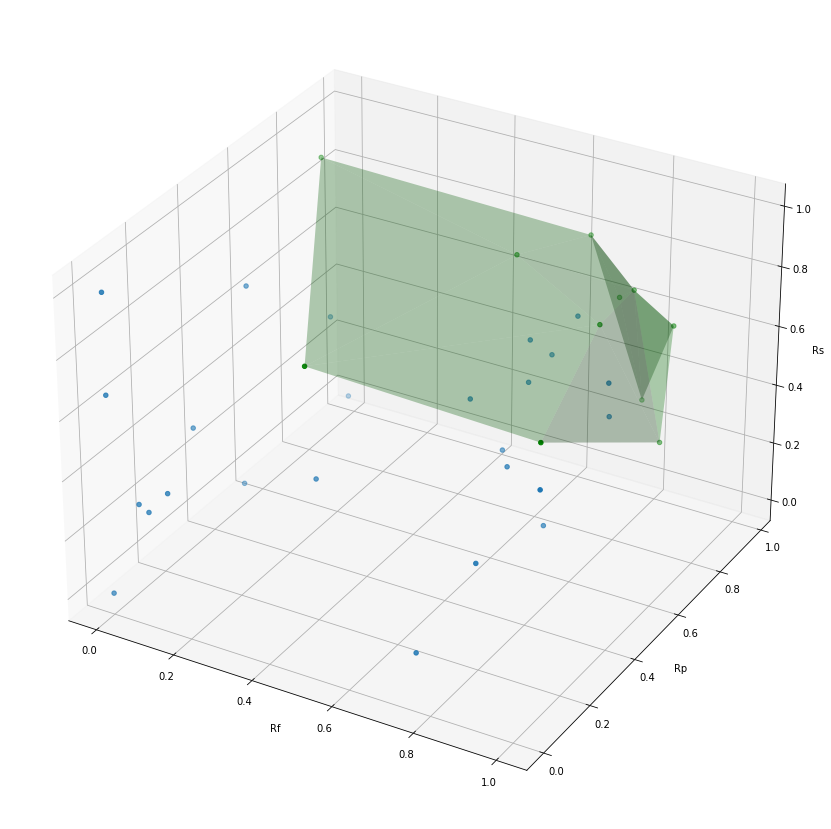

In [27]:
multiDimensionRank_100M.plot()
multiDimensionRank_250M.plot()
multiDimensionRank_500M.plot()

### Ranking Criteria Validation

This library provides two metrics of evaluation to evaluate the goodness of the ranking criteria the _conformance_ and _coherence_

- Conformance measures the adherence of the top-ranked configurations according to the actual query positioning of thoses configurations. We calculate conformance according to the equation below:

$$A(R^k) = 1 - \sum \limits _{i=0} ^{|Q|} \sum \limits _{j=0} ^{k} \frac {\bar{A}(i,j)}{|Q|*k}$$

Consider $R_{s}$ ranking and the top-3 ranked configurations are ${c_{1},c_{2},c_{3}}$, that overlaps only with the bottom-3 ranked configuration in query $|Q|$. That is, ${c_{4},c_{2},c_{5}}$. For example, $c_{2}$ is in the $59^{th}$ position out of 60 positions. <br>
Thus, $A(R^k) = 1- \frac {1}{(11*3)}$, when $k = 3$ and $|Q| = 11$

- Coherence is the measure agreement between two ranking sets that uses the same ranking criteria accross different experiments. We used Kendall's Index to calculate coherence, which counts the number of dis(agreements) between two ranking sets

$$K(R_{1}, R_{2}) = \sum \limits _{{i,j} \epsilon P} ^{} \frac {\bar{K}_{i,j}(R_{1}, R_{2})}{|P|}$$

In this experiment, we assume that rank sets are the dataset sizes (i.e. 100M and 250M). Kendall’s distance between two rank sets $R_{1}$ and $R_{2}$, where $|P|$ represents the set of unique pairs of distinct elements in the two sets. For instance, the $K$ index between $R_{1}={c_{1},c_{2},c_{3}}$ and $R_{2}={c_{1},c_{2},c_{4}}$ for 100M and 250M is 0.33, i.e., one disagreement out of three pair comparisons.

### PAPyA.Ranker.Conformance

#### <i>class</i> Ranker.<b>Conformance</b>(<i>config_path, log_path, ranking_sets, conformance_set, k, h</i>)
<i>Parameters:</i> <br>
&emsp; <b>config_path : str</b><br>
&emsp;&emsp;<small>Specify the path to your configuration file(s). <i>i.e ./UIModule/settings_watdiv.yaml</small></i><br>
&emsp;<b>log_path : str</b><br>
&emsp;&emsp;<small>Specify the path to your log file(s). <i>i.e ./UI Module/log_watdiv</small></i><br>
&emsp;<b>ranking_sets : str</b><br>
&emsp;&emsp;<small>Ranking sets of user choice. <i>i.e dataset sizes (100M)</small></i><br>
&emsp;<b>conformance_set : list</b><br>
&emsp;&emsp;<small>List of ranking criterions to see the scores of their conformances.</small><br>
&emsp;<b>k : int</b><br>
&emsp;&emsp;<small>Value of the top k subset of the ranking criteria. <i>i.e. _k_ = 5, takes the top 5 value of each ranking criteria in the conformance set</small></i><br>
&emsp;<b>h : int</b><br>
&emsp;&emsp;<small>Value of the threshold that will be counted for the conformance score. <i>i.e. _h_ = 28, take queries that has a ranking below 28 out of all the configuration</small></i><br>

In [28]:
from Ranker import Conformance

conformance_set = ['schemas', 'partition', 'storage', 'paretoQ', 'paretoAgg']
conf_100M = Conformance(config_watdiv, logs_watdiv, '100M', conformance_set, 5, 14)
conf_250M = Conformance(config_watdiv, logs_watdiv, '250M', conformance_set, 5, 14)
conf_500M = Conformance(config_watdiv, logs_watdiv, '500M', conformance_set, 5, 14)

### Ranker.Conformance.run

#### Conformance.<b>run</b>()
<small>This method returns a table of conformance scores for each of the ranking criterion that user specify in the conformance_set along with the k and h values for the formula</small>

In [29]:
#conformance scores for all ranking criterions in 250M dataset size
conf_100M.run()

,100M
schemas,0.69
partition,0.64
storage,0.64
paretoQ,0.89
paretoAgg,0.75


#### Conformance.<b>plot</b>(_mode_)
<small>This method returns a table of conformance scores for each of the ranking criterion that user specify in the conformance_set along with the k and h values for the formula</small><br><br>
<i>Parameters:</i> <br>
&emsp; <b>mode : 1/0</b><br>
&emsp;&emsp;<small>plot the results of conformance score, mode 0 is for global plotting while mode 1 takes the k highest configuration on each dimension to plot</small>

[0.85, 0.35, 0.8] [0.15000000000000002, 0.65, 0.19999999999999996]


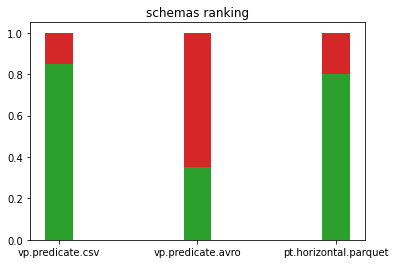

[0.9, 0.55, 0.7] [0.09999999999999998, 0.44999999999999996, 0.30000000000000004]


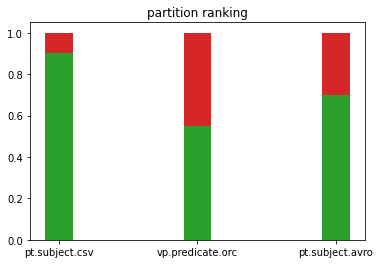

[0.6, 0.15000000000000002, 0.95] [0.4, 0.85, 0.050000000000000044]


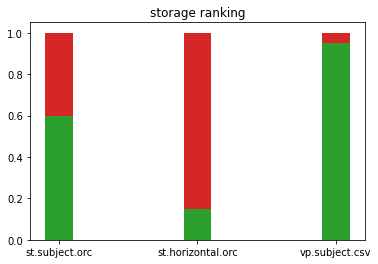

[0.9, 0.95, 0.85] [0.09999999999999998, 0.050000000000000044, 0.15000000000000002]


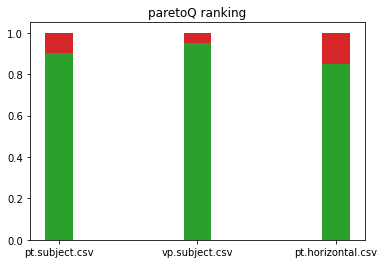

[0.9, 0.6, 0.95] [0.09999999999999998, 0.4, 0.050000000000000044]


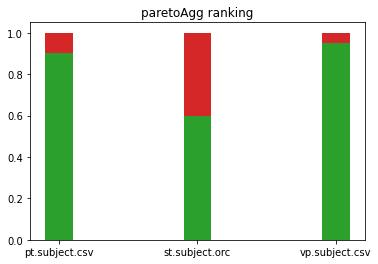

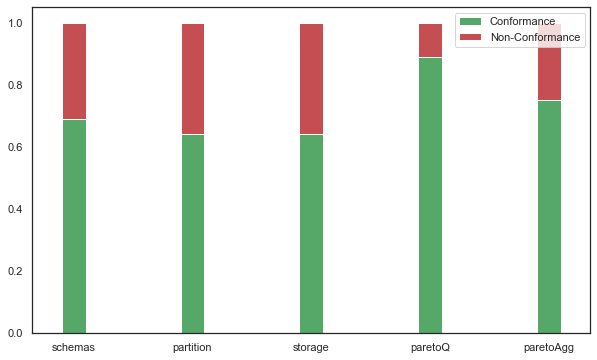

In [31]:
conf_100M.plot(1)
conf_100M.plot(0)

In [32]:
conf_250M.run()

,250M
schemas,0.78
partition,0.56
storage,0.28
paretoQ,0.93
paretoAgg,0.51


[0.9, 0.35, 0.9] [0.09999999999999998, 0.65, 0.09999999999999998]


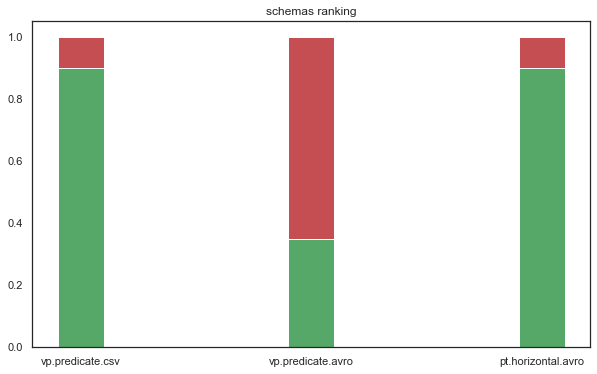

[0.0, 0.0, 0.95] [1.0, 1.0, 0.050000000000000044]


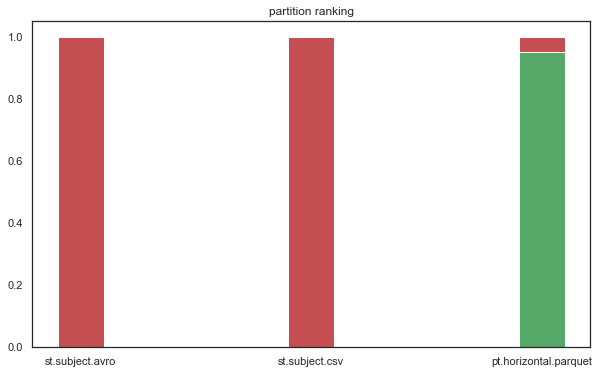

[0.19999999999999996, 0.0, 0.9] [0.8, 1.0, 0.09999999999999998]


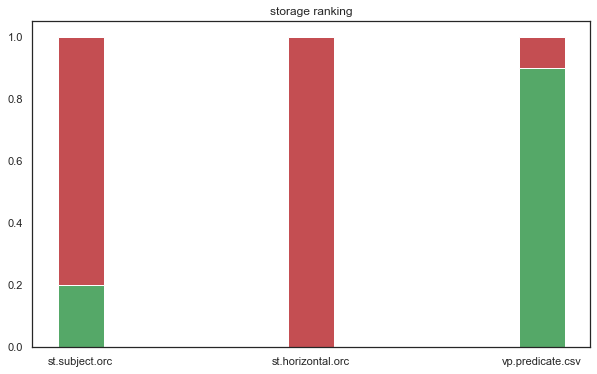

[0.95, 1.0, 0.85] [0.050000000000000044, 0.0, 0.15000000000000002]


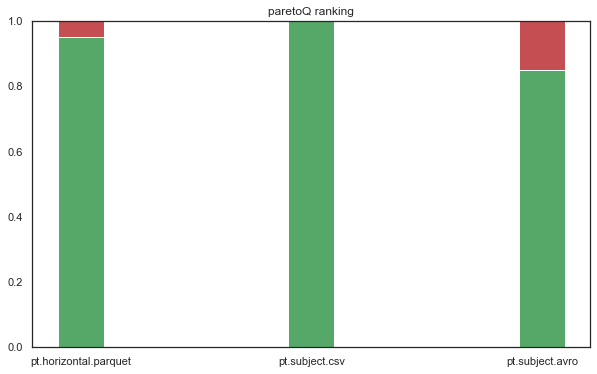

[0.95, 0.25, 0.9] [0.050000000000000044, 0.75, 0.09999999999999998]


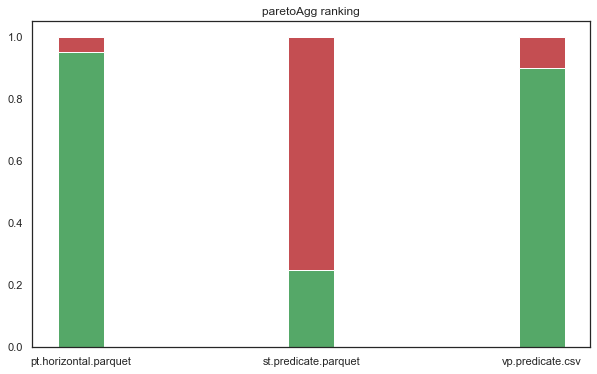

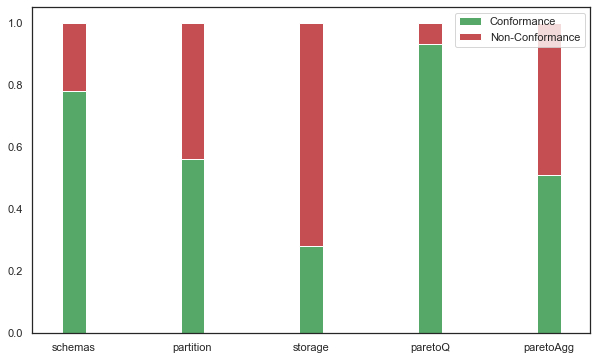

In [33]:
conf_250M.plot(1)
conf_250M.plot(0)

In [34]:
conf_500M.run()

,500M
schemas,0.73
partition,0.31
storage,0.17
paretoQ,0.92
paretoAgg,0.73


### Ranker.Conformance.configurationQueryRanks

#### Conformance.<b>configurationQueryRanks</b>(<i>dimension, mode</i>)
<small>This method returns a criteria table of a choosen ranking dimension, criteria table is a table that shows rank values of each queries by the top-k configurations</small><br><br>
<i>Parameters:</i> <br>
&emsp; <b>dimension : str</b><br>
&emsp;&emsp;<small>user's choosen dimension to view the criteria table</small><br><br>
&emsp; <b>mode : 0 (default) or 1</b><br>
&emsp;&emsp;<small>'0' show criteria table by their value</small><br>
&emsp;&emsp;<small>'1' show criteria table with true and false of h value (true, if h value is higher than h)</small>


In [35]:
conf_100M.configurationQueryRanks(dimension = 'schemas', mode = 0)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
vp.predicate.csv,6,2,24,4,11,3,5,4,7,6,5,6,16,3,1,6,10,15,8,9
vp.predicate.avro,22,10,19,14,18,11,9,19,16,7,23,12,12,22,16,17,15,16,20,18
pt.horizontal.parquet,10,19,3,11,5,8,7,6,8,21,4,16,1,16,6,14,2,8,7,4
pt.subject.avro,16,16,4,6,2,7,10,10,17,5,19,21,17,7,10,12,3,4,1,5
pt.horizontal.avro,14,21,6,9,4,9,14,11,15,15,29,24,11,4,9,10,4,5,3,6


In [36]:
conf_100M.configurationQueryRanks(dimension = 'partition', mode = 0)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
pt.subject.csv,1,8,15,1,3,4,2,2,10,18,2,14,2,1,7,2,5,7,4,1
vp.predicate.orc,9,15,22,16,15,14,8,18,3,1,22,1,6,25,5,11,13,9,19,19
pt.subject.avro,16,16,4,6,2,7,10,10,17,5,19,21,17,7,10,12,3,4,1,5
vp.predicate.parquet,5,14,27,15,17,12,3,20,18,3,27,3,5,24,15,15,12,11,18,20
st.subject.orc,25,17,9,12,13,10,16,9,21,22,8,9,20,9,14,5,17,20,11,7


In [37]:
conf_100M.configurationQueryRanks(dimension = 'storage', mode = 0)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
st.subject.orc,25,17,9,12,13,10,16,9,21,22,8,9,20,9,14,5,17,20,11,7
st.horizontal.orc,26,26,18,19,21,16,19,14,24,24,12,19,24,13,22,21,25,25,15,15
vp.subject.csv,3,3,23,3,9,1,4,1,5,13,1,2,10,6,8,4,9,10,6,10
st.predicate.orc,21,22,14,13,12,23,13,13,25,20,13,18,21,8,3,8,14,13,16,14
vp.horizontal.csv,4,4,20,8,10,2,6,7,4,11,7,7,4,5,17,3,11,12,10,8


In [38]:
conf_250M.configurationQueryRanks(dimension = 'schemas', mode = 0)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
vp.predicate.csv,5,11,29,13,10,10,11,5,13,1,15,10,11,8,7,4,9,10,9,13
vp.predicate.avro,21,13,22,14,14,14,10,20,18,10,20,11,19,23,25,22,19,15,18,18
pt.horizontal.avro,20,14,6,6,6,3,2,6,4,6,5,21,3,4,4,14,6,3,5,8
pt.horizontal.parquet,12,12,2,3,5,4,5,4,3,7,6,16,1,2,1,11,3,1,2,6
pt.subject.parquet,6,16,4,15,2,11,3,9,5,18,9,14,2,26,10,12,1,8,3,5


In [39]:
conf_250M.configurationQueryRanks(dimension = 'partition', mode = 0)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
st.subject.avro,27,31,30,27,27,27,27,28,28,28,31,27,29,31,31,28,27,27,27,28
st.subject.csv,35,34,34,34,35,35,34,34,35,34,34,30,34,34,34,34,32,34,34,31
pt.horizontal.parquet,12,12,2,3,5,4,5,4,3,7,6,16,1,2,1,11,3,1,2,6
pt.subject.avro,16,15,5,1,4,1,6,7,1,4,4,19,7,3,3,9,10,6,4,3
pt.subject.csv,1,8,13,4,8,5,8,1,10,3,14,13,6,5,2,1,8,4,6,1


In [40]:
conf_250M.configurationQueryRanks(dimension = 'storage', mode = 0)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
st.subject.orc,24,22,7,17,20,16,22,16,21,23,23,17,22,12,14,8,15,17,19,19
st.horizontal.orc,26,26,15,23,23,24,25,23,24,25,29,24,23,24,24,21,24,25,20,23
vp.predicate.csv,5,11,29,13,10,10,11,5,13,1,15,10,11,8,7,4,9,10,9,13
pt.predicate.csv,33,27,25,30,30,30,30,27,26,27,21,31,27,10,27,30,30,30,30,30
st.predicate.orc,17,23,8,20,21,20,21,19,23,22,24,22,21,17,11,7,12,14,23,21


In [41]:
conf_500M.configurationQueryRanks(dimension = 'schemas', mode = 0)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
vp.predicate.avro,20,18,11,16,18,16,9,18,14,14,13,11,20,18,20,14,16,18,15,18
vp.predicate.csv,4,17,24,17,11,14,17,9,17,9,15,12,10,12,12,11,13,10,18,16
pt.subject.avro,12,7,8,6,5,5,5,11,8,13,10,18,5,5,8,4,4,4,7,6
pt.subject.parquet,15,12,2,3,3,3,1,5,2,3,3,9,3,1,5,22,15,3,2,2
pt.horizontal.parquet,18,9,6,7,8,7,6,1,7,12,5,16,4,4,1,5,2,5,4,4


In [42]:
conf_500M.configurationQueryRanks(dimension = 'partition', mode = 0)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
pt.subject.csv,1,15,22,5,2,15,7,2,15,18,17,15,12,7,6,3,7,7,5,8
st.predicate.csv,34,34,34,34,34,34,34,34,34,35,34,34,34,34,34,34,34,34,34,34
st.predicate.parquet,21,21,17,22,21,22,21,21,25,21,26,23,22,24,15,16,19,15,22,23
vp.subject.csv,2,3,19,15,9,13,11,6,13,4,14,8,7,10,9,8,6,9,13,14
st.subject.avro,28,32,31,29,31,27,32,28,28,30,30,27,30,30,30,27,27,27,28,27


In [43]:
conf_500M.configurationQueryRanks(dimension = 'storage', mode = 0)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
st.horizontal.orc,25,25,21,24,24,24,24,24,26,24,27,24,24,27,24,24,24,24,24,24
st.subject.orc,22,22,4,23,23,19,23,19,21,23,23,22,23,22,18,17,23,23,19,19
pt.predicate.csv,30,24,27,27,27,28,27,27,22,27,22,30,27,13,25,30,30,30,30,31
st.predicate.orc,23,23,12,21,22,21,22,22,23,22,25,21,21,25,13,15,20,13,23,22
vp.predicate.csv,4,17,24,17,11,14,17,9,17,9,15,12,10,12,12,11,13,10,18,16


In [44]:
conf_100M.configurationQueryRanks(dimension = 'paretoAgg', mode = 1)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
vp.subject.csv,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
pt.subject.csv,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
pt.subject.avro,True,True,False,False,False,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False
st.subject.orc,True,True,False,False,False,False,True,False,True,True,False,False,True,False,False,False,True,True,False,False
st.predicate.orc,True,True,False,False,False,True,False,False,True,True,False,True,True,False,False,False,False,False,True,False


In [45]:
conf_100M.configurationQueryRanks(dimension = 'partition', mode = 1)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
pt.subject.csv,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
pt.subject.avro,True,True,False,False,False,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False
st.subject.orc,True,True,False,False,False,False,True,False,True,True,False,False,True,False,False,False,True,True,False,False
vp.predicate.orc,False,True,True,True,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,True
vp.predicate.parquet,False,False,True,True,True,False,False,True,True,False,True,False,False,True,True,True,False,False,True,True


In [46]:
conf_100M.configurationQueryRanks(dimension = 'storage', mode = 1)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
vp.subject.csv,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
vp.horizontal.csv,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
st.subject.orc,True,True,False,False,False,False,True,False,True,True,False,False,True,False,False,False,True,True,False,False
st.predicate.orc,True,True,False,False,False,True,False,False,True,True,False,True,True,False,False,False,False,False,True,False
st.horizontal.orc,True,True,True,True,True,True,True,False,True,True,False,True,True,False,True,True,True,True,True,True


In [47]:
conf_250M.configurationQueryRanks(dimension = 'schemas', mode = 1)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
pt.horizontal.parquet,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
vp.predicate.csv,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
pt.horizontal.avro,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
pt.subject.parquet,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
vp.predicate.avro,True,False,True,False,False,False,False,True,True,False,True,False,True,True,True,True,True,True,True,True


In [48]:
conf_250M.configurationQueryRanks(dimension = 'partition', mode = 1)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
pt.subject.csv,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
pt.horizontal.parquet,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
pt.subject.avro,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
st.subject.avro,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
st.subject.csv,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [49]:
conf_250M.configurationQueryRanks(dimension = 'storage', mode = 1)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
vp.predicate.csv,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
st.predicate.orc,True,True,False,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,True,True
st.subject.orc,True,True,False,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,True,True
pt.predicate.csv,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True
st.horizontal.orc,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [50]:
conf_500M.configurationQueryRanks(dimension = 'schemas', mode = 1)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
pt.subject.avro,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
pt.horizontal.parquet,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
pt.subject.parquet,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
vp.predicate.csv,False,True,True,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,True
vp.predicate.avro,True,True,False,True,True,True,False,True,False,False,False,False,True,True,True,False,True,True,True,True


In [51]:
conf_500M.configurationQueryRanks(dimension = 'partition', mode = 1)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
vp.subject.csv,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
pt.subject.csv,False,True,True,False,False,True,False,False,True,True,True,True,False,False,False,False,False,False,False,False
st.predicate.csv,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
st.predicate.parquet,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
st.subject.avro,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [52]:
conf_500M.configurationQueryRanks(dimension = 'storage', mode = 1)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
vp.predicate.csv,False,True,True,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,True
st.predicate.orc,True,True,False,True,True,True,True,True,True,True,True,True,True,True,False,True,True,False,True,True
st.subject.orc,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
pt.predicate.csv,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True
st.horizontal.orc,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


### PAPyA.Ranker.Coherence

#### <i>class</i> Ranker.<b>Coherence</b>(<i>config_path, log_path, conformance_set</i>)
<i>Parameters:</i> <br>
&emsp; <b>config_path : str</b><br>
&emsp;&emsp;<small>Specify the path to your configuration file(s). <i>i.e ./UIModule/settings_watdiv.yaml</small></i><br>
&emsp;<b>log_path : str</b><br>
&emsp;&emsp;<small>Specify the path to your log file(s). <i>i.e ./UI Module/log_watdiv</small></i><br>
&emsp;<b>conformance_set : list</b><br>
&emsp;&emsp;<small>List of ranking criterions to see their kendall index's scores between ranking sets (i.e. dataset sizes).</small><br>

In [53]:
from Ranker import Coherence

coherence_set = ['schemas', 'partition', 'storage', 'paretoQ', 'paretoAgg']
coh = Coherence(config_watdiv, logs_watdiv,coherence_set)

### Ranker.Coherence.run

#### Coherence.<b>run</b>(<i>rankset1, rankset2</i>)
<small>This method returns a table of coherence scores for each of the ranking criterion that user specify in the conformance_set by calculating the number of (dis)agreements between 2 ranking sets</small><br><br>
<i>Parameters:</i> <br>
&emsp; <b>rankset1 : str</b><br>
&emsp;&emsp;<small>a string of the _first_ rankset that user wants to compare</small><br><br>
&emsp; <b>rankset2 : str</b><br>
&emsp;&emsp;<small>a string of the _second_ rankset that user wants to compare</small><br>

In [54]:
#example of coherence scores for all ranking criterions by comparing 100M ranking set with 250M ranking set
coh.run('100M', '250M')

,Kendall's Index
schemas,0.284127
partition,0.352381
storage,0.426984
paretoQ,0.434783
paretoAgg,0.363636


In [55]:
coh.run('100M', '500M')

,Kendall's Index
schemas,0.330159
partition,0.403175
storage,0.573016
paretoQ,0.510870
paretoAgg,0.483516


In [56]:
coh.run('250M', '500M')

,Kendall's Index
schemas,0.271429
partition,0.453968
storage,0.431746
paretoQ,0.452381
paretoAgg,0.628205


### Ranker.Coherence.heatMap

#### Coherence.<b>heatMap</b>(<i>rankset1, rankset2, dimension</i>)
<small>This method returns a heat map table that shows the coherence between two particular ranking sets that user can choose, the heat map will be sorted by the best performing configurations of the first ranking set</small><br><br>
<i>Parameters:</i> <br>
&emsp; <b>rankset1 : str</b><br>
&emsp;&emsp;<small>a string of the _first_ rankset that user wants to compare</small><br><br>
&emsp; <b>rankset2 : str</b><br>
&emsp;&emsp;<small>a string of the _second_ rankset that user wants to compare</small><br>
&emsp; <b>dimension : str</b><br>
&emsp;&emsp;<small>user's choosen dimension to view the heat map</small><br><br>

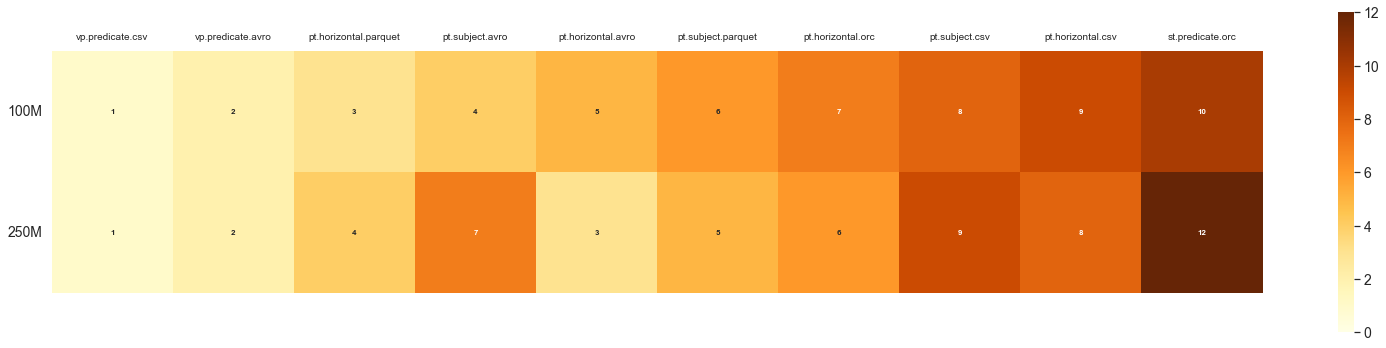

In [57]:
coh.heatMap('100M', "250M", dimension='schemas')

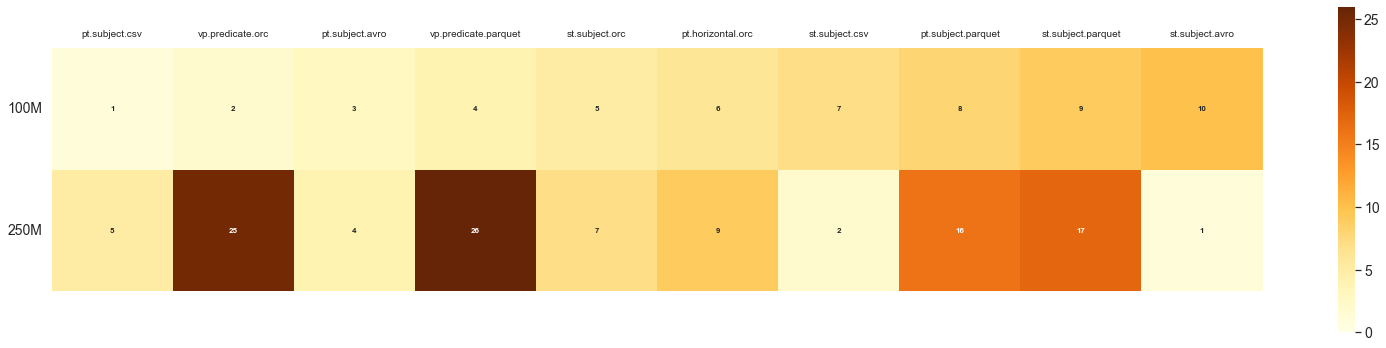

In [58]:
coh.heatMap('100M', "250M", dimension='partition')

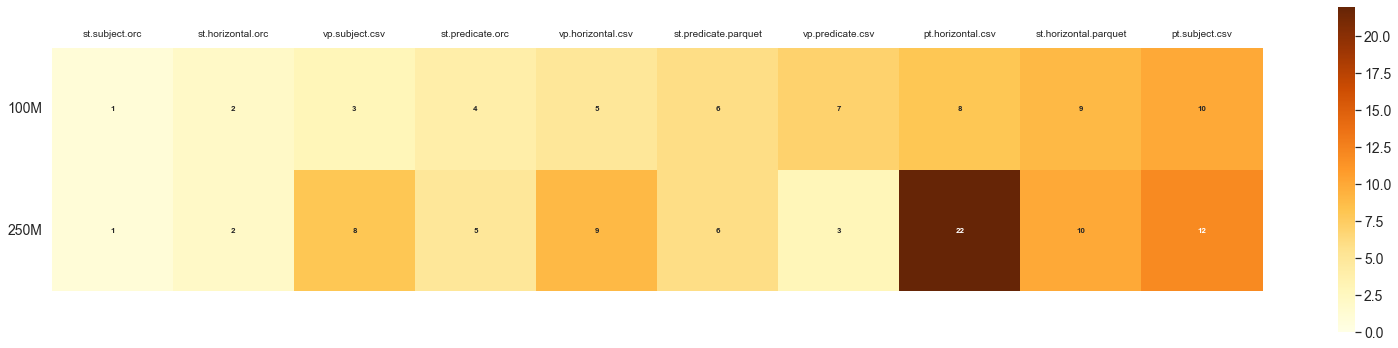

In [59]:
coh.heatMap('100M', "250M", dimension='storage')

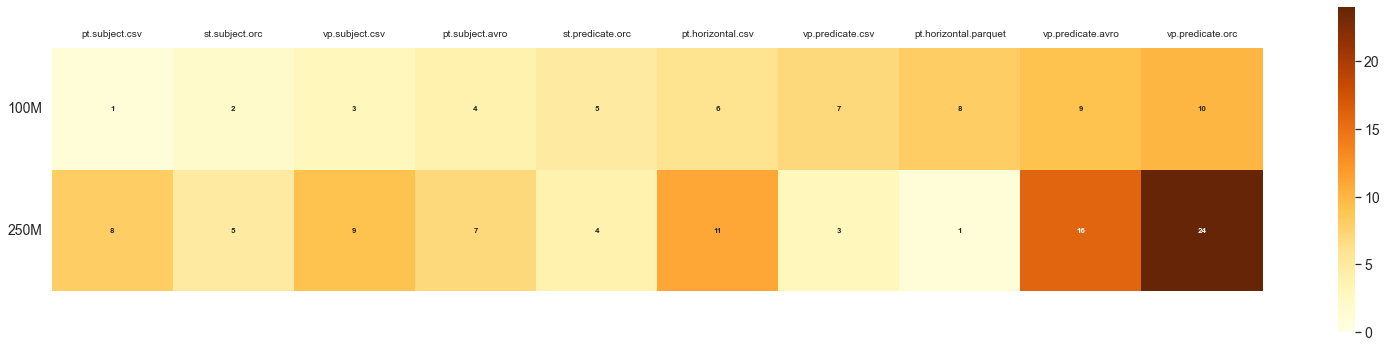

In [60]:
coh.heatMap('100M', "250M", dimension='paretoAgg')

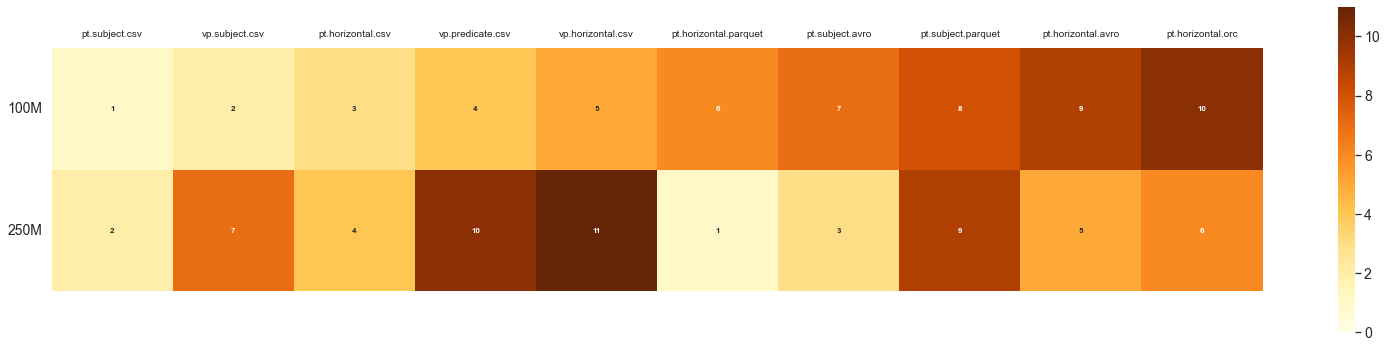

In [61]:
coh.heatMap('100M', "250M", dimension='paretoQ')

### Ranker.Coherence.heatMapSubtract

#### Coherence.<b>heatMap</b>(<i>*args, dimension</i>)
<small>This method shows the coherence differences between two particular ranking sets that user chooses, the first ranking sets will be the pivot point (between 100M-250M, and 100M-500M shown in the example). The heat map will be sorted by the best performing configurations of the first ranking set</small><br><br>
<i>Parameters:</i> <br>
&emsp; <b>*args : str</b><br>
&emsp;&emsp;<small>takes an arbitrary number of ranking sets, the first ranking set will be the pivot point for all the other ranking sets</small><br><br>
&emsp; <b>dimension : str</b><br>
&emsp;&emsp;<small>user's choosen dimension to view the heat map</small><br><br>

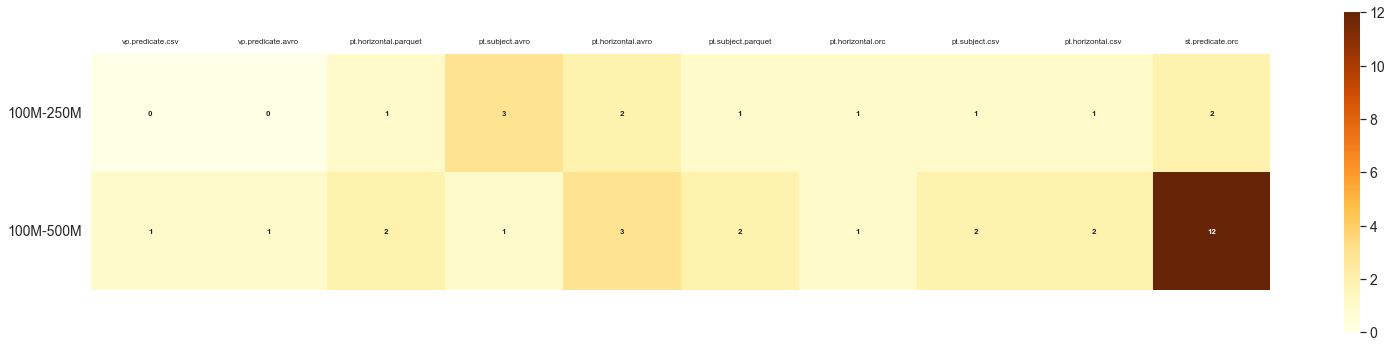

In [62]:
coh.heatMapSubtract('100M', '250M', '500M', dimension='schemas')

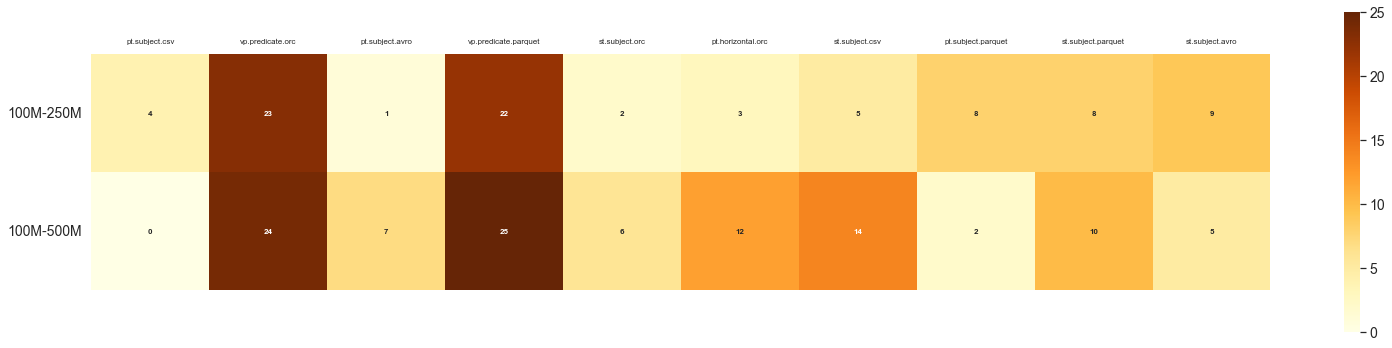

In [63]:
coh.heatMapSubtract('100M', '250M', '500M', dimension='partition')

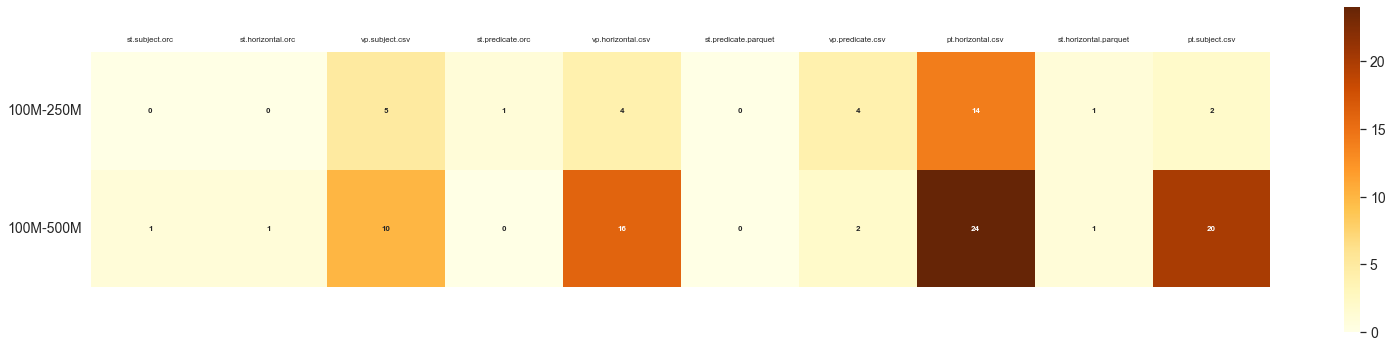

In [64]:
coh.heatMapSubtract('100M', '250M', '500M', dimension='storage')

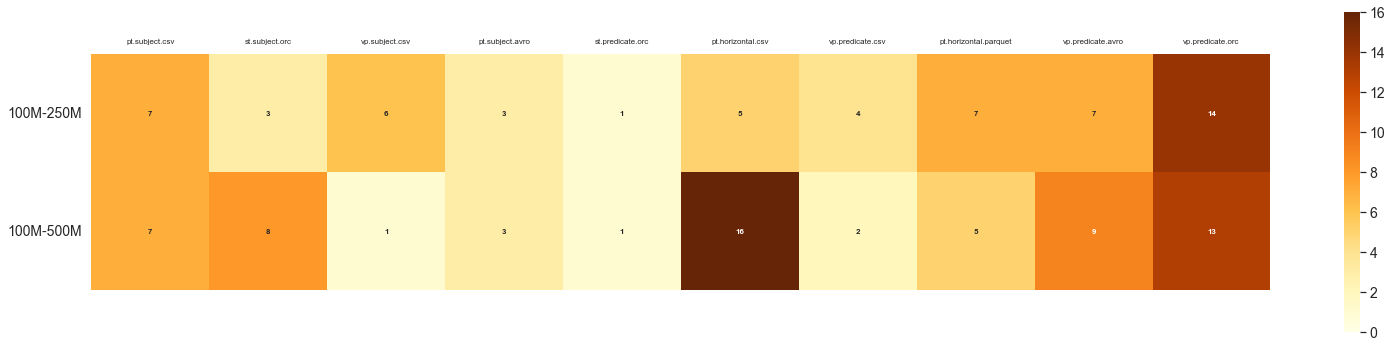

In [65]:
coh.heatMapSubtract('100M', '250M', '500M', dimension='paretoAgg')

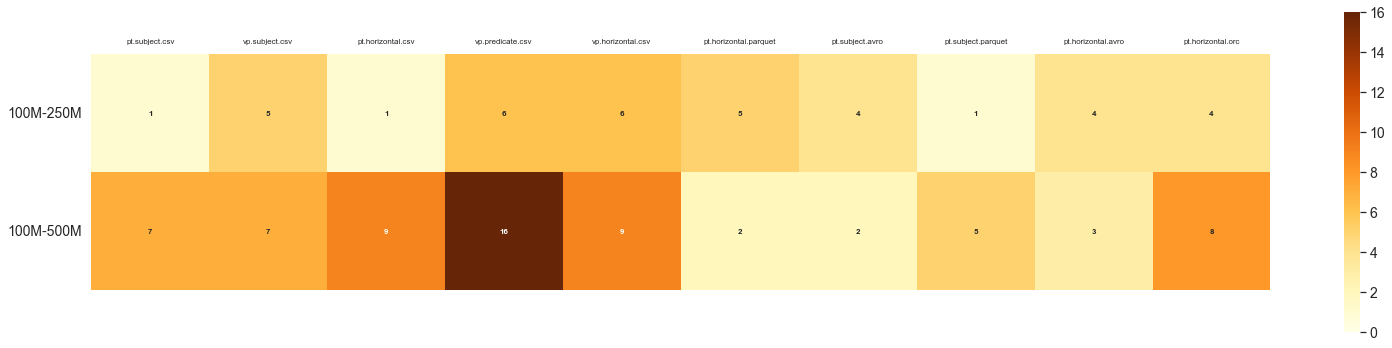

In [66]:
coh.heatMapSubtract('100M', '250M', '500M', dimension='paretoQ')